 # 📊 DATA ANALYTICS TECHFEST 2025
## Efektivitas Penyaluran Dana Transfer ke Daerah (TKDD): Studi Perbandingan Pagu dan Realisasi TKDD di Provinsi-Provinsi Indonesia Tahun 2023
---

## 👥 **Nama Tim : kasih aba2 klo udh final**

1. Bintang Ryan Wardana  
2. Nicholas Marco W.  
3. Stephanie Hebrina M. S.

## ❓ **Rumusan Masalah**
Dalam studi kasus ini, beberapa pertanyaan utama yang akan dijawab melalui analisis data adalah:

1. **Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia pada tahun 2023?**  
2. **Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah?**  
3. **Apa saja kemungkinan faktor-faktor yang memengaruhi tinggi-rendahnya realisasi TKDD?**
4. **Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?**  
5. **Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023?**

## 🎯 **Tujuan Analisis**

Berikut merupakan tujuan dari analisis data yang dilakukan :
- Melakukan analisis perbandingan antara pagu TKDD dan realisasi TKDD.  
- Menghitung persentase realisasi dan mengklasifikasikannya ke dalam kategori tertentu.  
- Mengidentifikasi provinsi dengan tingkat realisasi TKDD tertinggi dan terendah.  
- Menggali faktor-faktor yang memengaruhi tinggi-rendahnya realisasi TKDD?
- Menganalisis hubungan antara realisasi TKDD dan IPM.  
- Menggali faktor-faktor yang memengaruhi IPM setiap provinsi.  
- Memberikan insight dan rekomendasi kebijakan untuk meningkatkan efektivitas alokasi dan pelaksanaan anggaran.

---


# 🧹 **1. Data Preparation**

Pada tahap ini, kami akan menyiapkan data agar siap digunakan untuk proses analisis. Beberapa langkah yang akan dilakukan meliputi:

- **1.1 Memuat Dataset dan Library**
- **1.2 Memahami Struktur Data & Statistik Deskriptif** 
- **1.3 Pengecekan Missing Values dan Duplikasi Data** 
- **1.4 Visualisasi Distribusi Data (Skewness)**
- **1.5 Penanganan Missing Values**

Langkah ini bertujuan untuk memastikan bahwa data yang akan dianalisis sudah bersih, lengkap, dan relevan dengan rumusan masalah yang diangkat.


### **1.1 Memuat Dataset dan Library**

Pada bagian ini, kami melakukan beberapa hal:

- **Mengimpor library utama** yang digunakan dalam analisis data:
  - `pandas` untuk manipulasi data
  - `matplotlib.pyplot` dan `seaborn` untuk visualisasi data
  - `numpy` untuk operasi numerik
  - `statsmodels` dan `scipy.stats` untuk analisis statistik

- **Membaca dataset** dari file Excel menggunakan `pandas.read_excel()`. 

- **Menampilkan 5 baris pertama** dari dataset menggunakan `df.head()` agar bisa langsung melihat isi dan struktur awal data.


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
plt.style.use('seaborn-v0_8')

try:
    df = pd.read_excel('C:/TECHFEST/dataset.xlsx')
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("Error: File dataset tidak ditemukan.")
    exit()
    
df.head()

Dataset berhasil dimuat.


,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5744760.778,14.45,227018.20,41408000,4.23
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2529543.013,4.25,274358.18,62294000,5.71
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1435635.736,6.17,814122.03,66147000,4.81
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5127605.128,14.04,96583.09,46300000,4.28
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2758522.329,11.04,180696.04,48360000,5.07


---
### **1.2 Memahami Struktur Data & Statistik Deskriptif**

Pada tahap ini, dilakukan inspeksi awal terhadap dataset untuk memahami struktur dan isi data secara umum. Beberapa hal yang dilakukan:

- **Menampilkan jumlah baris** pada dataset untuk mengetahui ukuran data.
- **Menampilkan informasi struktur DataFrame** menggunakan `df.info()`:
  - Menampilkan nama kolom, jumlah non-null (tidak kosong), dan tipe data tiap kolom.
  - Membantu mengidentifikasi apakah ada missing value yang perlu ditangani.
- **Menampilkan statistik deskriptif** dari kolom numerik menggunakan `df.describe()`:
  - Memberikan ringkasan seperti mean, standard deviation, min, max, dan kuartil.
  - Berguna untuk melihat distribusi awal data, mendeteksi nilai ekstrem (outlier), dan memahami sebaran antar kolom.

In [90]:
# Sel 2: Inspeksi Awal Data (Gambaran Umum)
print(f"Jumlah baris dataset: {len(df)}\n")

print("--- Info DataFrame ---")
df.info()

print("\n--- Ringkasan Statistik Deskriptif ---")
df.describe()

Jumlah baris dataset: 38

--- Info DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             34 non-null     float64
 2   Pagu TKDD                                                       37 non-null     float64
 3   Realisasi TKDD                                                  37 non-null     float64
 4   Jumlah Penduduk                                                 36 non-null     float64
 5   Anggaran APBN per kapita                                        35 non-null     float64
 6   Persentase Penduduk Miskin                                      34 non-null     float64
 7   Produk

,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
count,34.000000,3.700000e+01,3.700000e+01,3.600000e+01,3.500000e+01,34.000000,3.800000e+01,3.800000e+01,38.000000
mean,73.770294,2.344045e+13,2.380704e+13,1.016567e+07,5.166896e+06,10.089118,5.403080e+05,7.956650e+07,5.273421
std,3.763013,1.823356e+13,1.852826e+13,1.475693e+07,3.916483e+06,5.183509,8.182349e+05,5.973829e+07,2.924139
min,63.010000,6.172420e+12,6.155410e+12,7.201000e+05,3.800443e+05,4.250000,2.443399e+04,1.687000e+07,1.800000
25%,72.397500,1.115211e+13,1.151835e+13,2.105975e+06,2.564899e+06,6.240000,9.806901e+04,4.823325e+07,4.400000
50%,73.910000,1.745338e+13,1.746738e+13,4.402000e+06,4.225661e+06,8.425000,2.179008e+05,6.392100e+07,4.890000
75%,75.017500,2.769023e+13,2.886221e+13,8.800500e+06,6.051469e+06,12.252500,5.840892e+05,7.735900e+07,5.175000
max,83.550000,8.200830e+13,8.192189e+13,5.549700e+07,1.609953e+07,26.030000,3.443026e+06,3.226190e+08,20.490000


---
### **1.3 Pengecekan Missing Values dan Duplikasi Data**

In [91]:
df.isnull().sum()

Provinsi                                                          0
IPM                                                               4
Pagu TKDD                                                         1
Realisasi TKDD                                                    1
Jumlah Penduduk                                                   2
Anggaran APBN per kapita                                          3
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

In [92]:
df_miss=df[df.isnull().any(axis=1)]
df_miss

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
25,PAPUA BARAT DAYA,NaN,1.016348e+13,1.013204e+13,6113520.0,1.657317e+06,NaN,36104.57,58450000,1.82
26,PAPUA PEGUNUNGAN,NaN,1.354314e+13,1.282176e+13,NaN,NaN,NaN,24433.99,16870000,4.78
27,PAPUA SELATAN,NaN,8.094830e+12,7.658020e+12,NaN,NaN,NaN,31357.75,58677000,4.23
28,PAPUA TENGAH,NaN,1.439523e+13,1.494127e+13,1351659.0,1.105402e+07,NaN,150377.18,103508000,5.95
34,SULAWESI UTARA,75.04,NaN,NaN,2660800.0,NaN,7.38,171969.42,64131000,5.48


### *Temuan Missing Values*

Berdasarkan hasil pengecekan, ditemukan **15 data yang hilang** yang tersebar pada **5 baris** data. Hal ini terlihat dari hasil filtering `df[df.isnull().any(axis=1)]`, yang menampilkan baris-baris dengan nilai kosong pada satu atau lebih kolom.

Penanganan missing values akan dilakukan setelah melihat persebaran data dan disesuaikan dengan karakteristik data dan kepentingan analisis selanjutnya.


In [93]:
df.duplicated().sum()

0

### *Temuan Duplikasi*

Berdasarkan hasil pengecekan, tidak ditemukan data yang terduplikasi

---
### **1.4 Visualisasi Distribusi Data (Skewness)**

Pada bagian ini, dilakukan visualisasi distribusi dari seluruh kolom numerik yang terdapat dalam dataset. Tujuannya adalah untuk:

- Melihat bentuk sebaran data (apakah normal, miring ke kiri/kanan, atau terdapat outlier).
- Mengidentifikasi potensi masalah seperti skewness (kemencengan) dan outlier.
- Membantu dalam menentukan metode transformasi atau imputasi data pada tahap berikutnya.

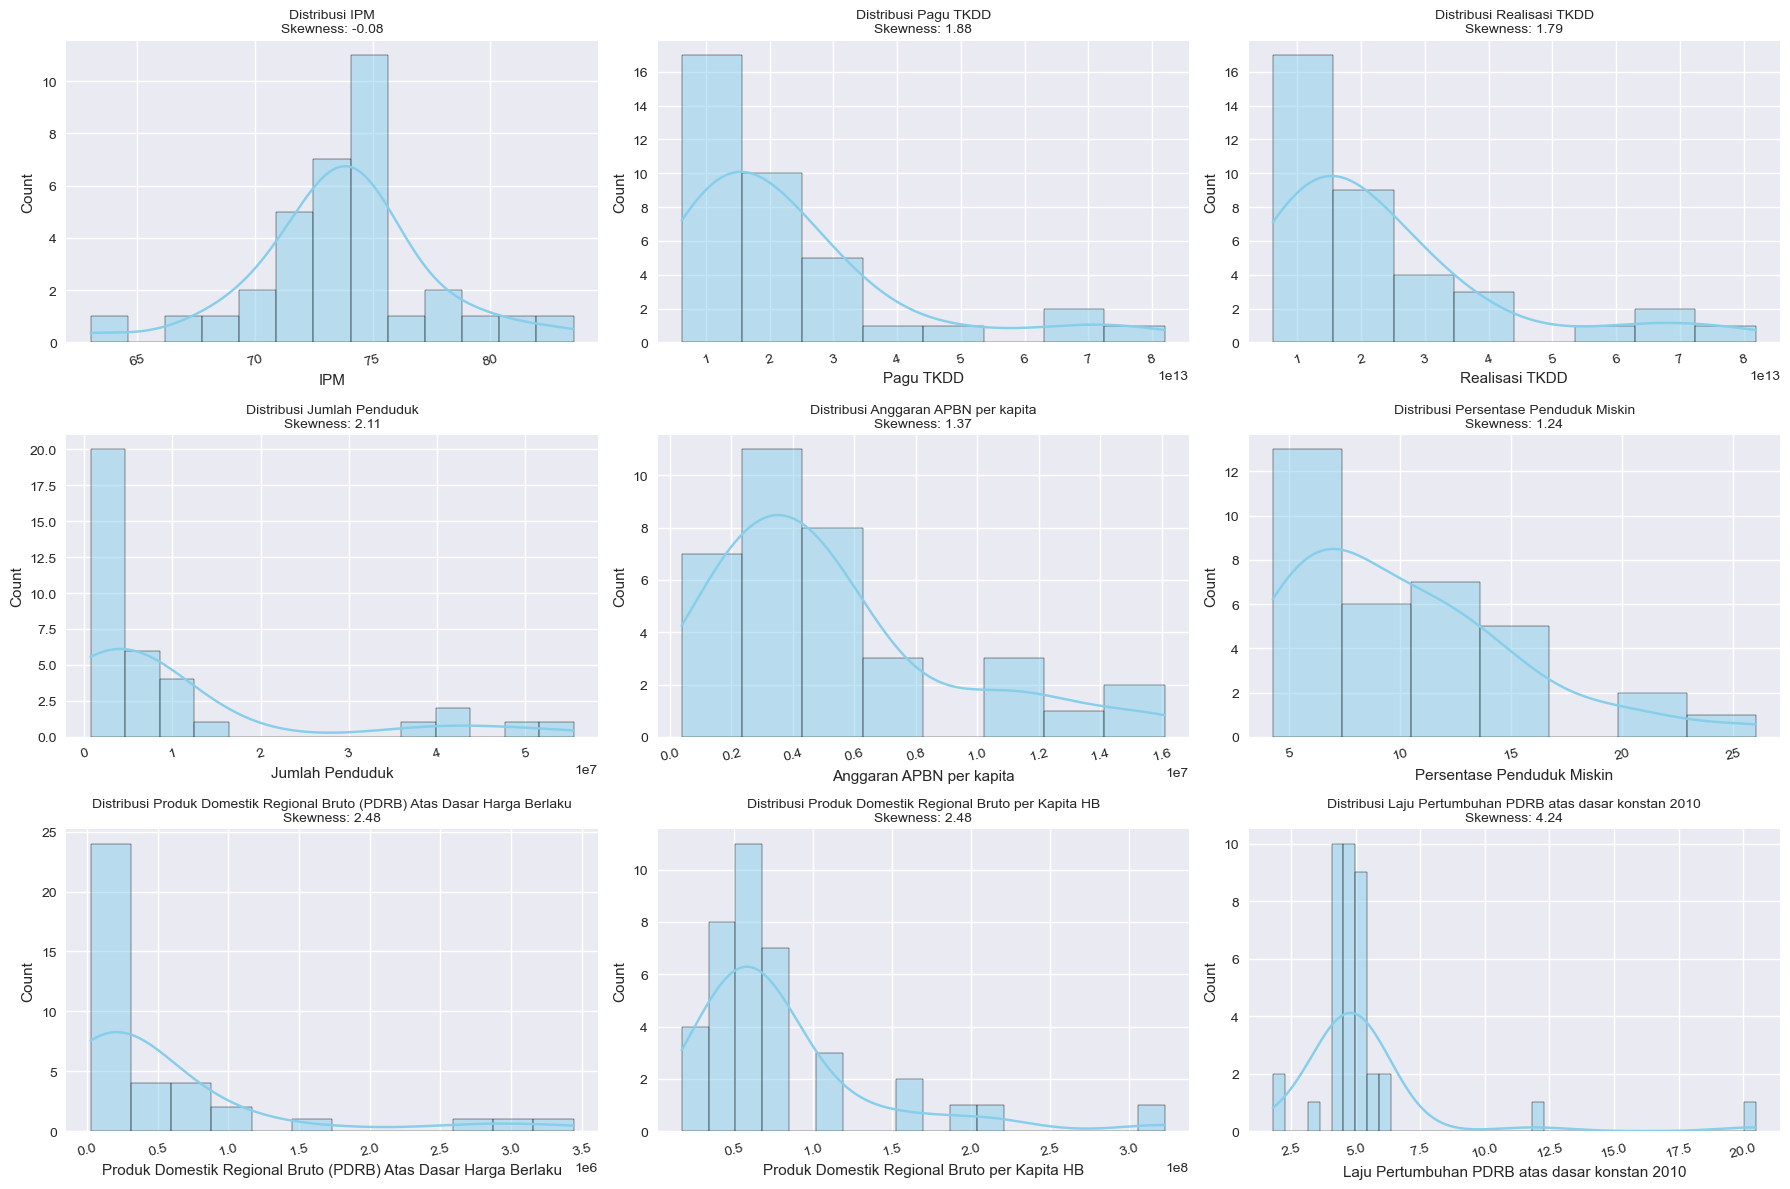

In [94]:
import math

numerik_cols = df.select_dtypes(include='number').columns.tolist()

n = len(numerik_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()  # Ubah jadi 1D array biar mudah di-loop

for i, col in enumerate(numerik_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}', fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=15)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


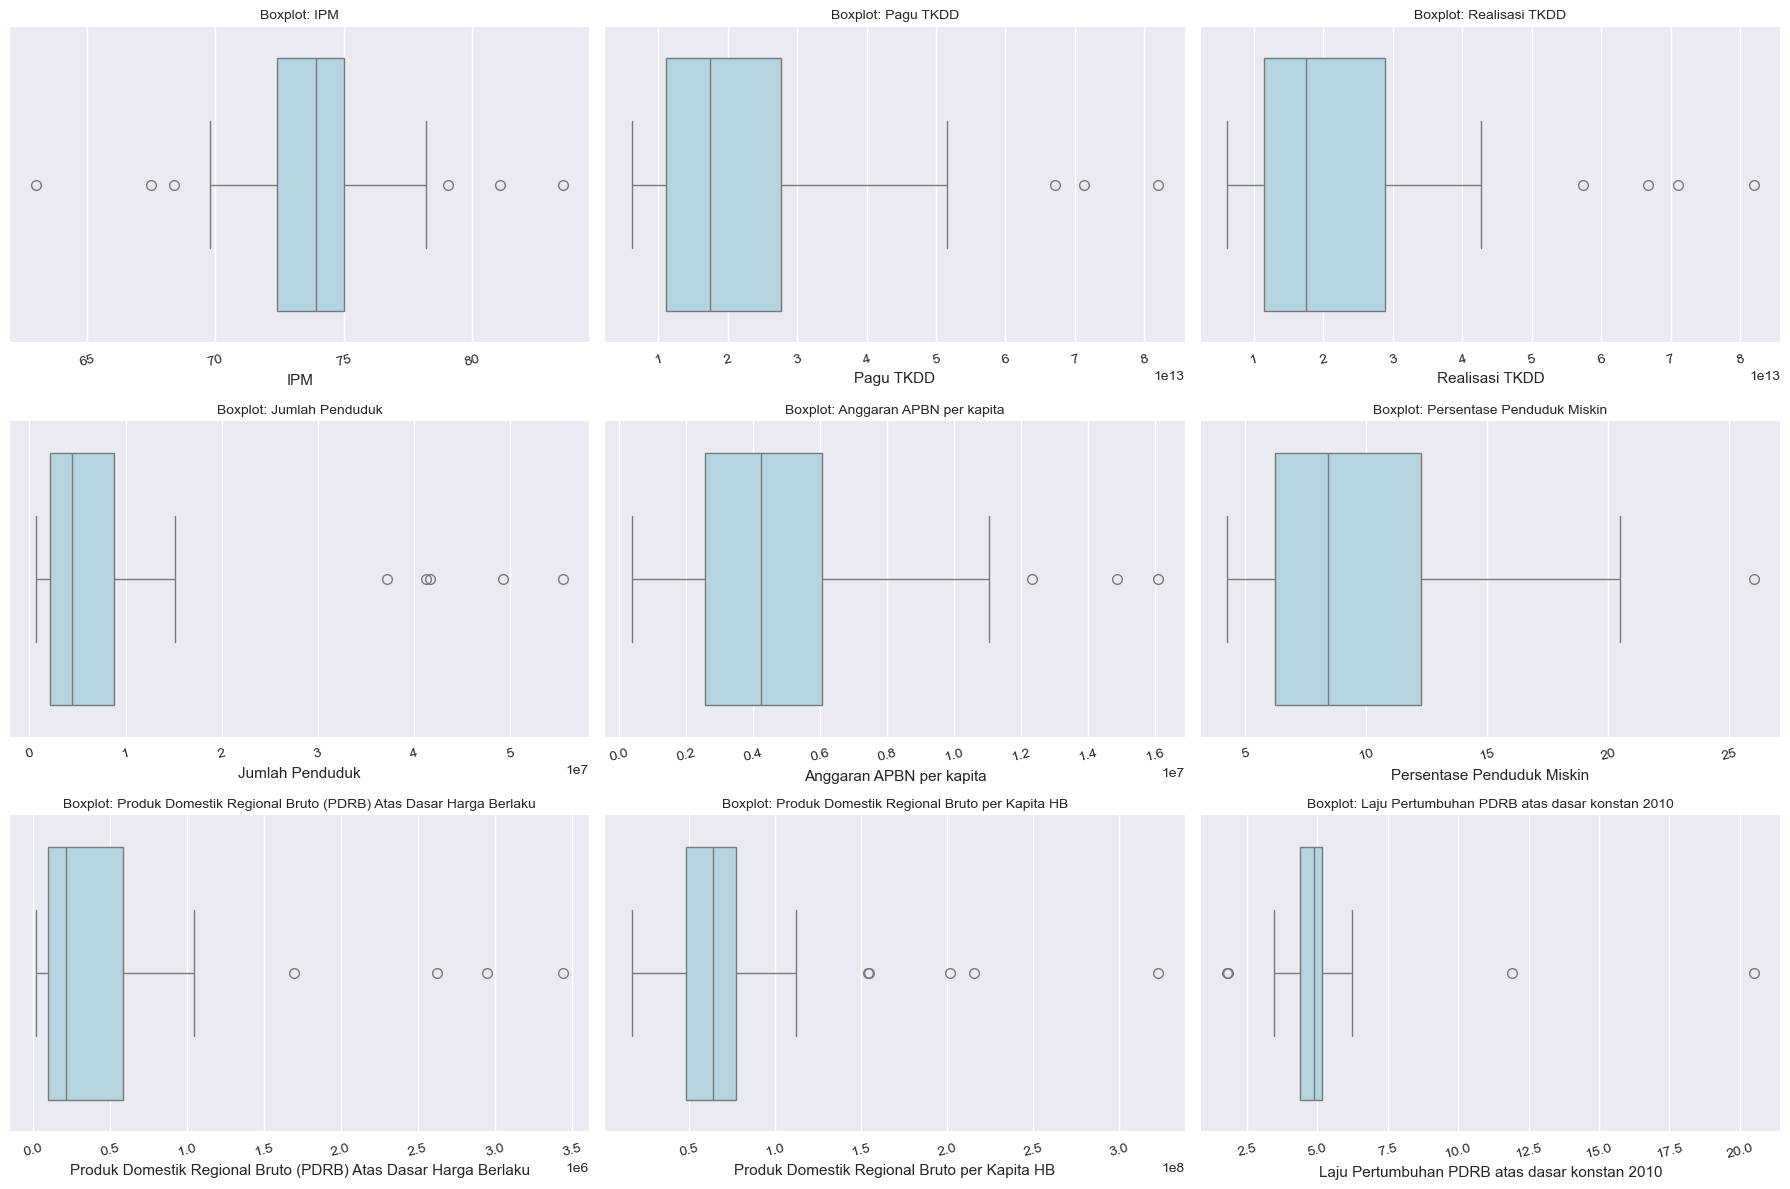

In [95]:
cols = 3
rows = math.ceil(len(numerik_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()  # Ubah ke 1D agar mudah diakses dengan index

for i, col in enumerate(numerik_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot: {col}', fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=15)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### *Temuan Skewness, Distribusi, dan Outlier*

Berdasarkan visualisasi histogram dan boxplot terhadap seluruh kolom numerik, ditemukan beberapa hal penting:

🔹 Distribusi dan Skewness
- Hanya kolom **IPM** yang memiliki distribusi mendekati normal, dengan **skewness sebesar -0.08**, menunjukkan distribusi hampir simetris.
- Sementara kolom lainnya memiliki **skewness > 1.2**, yang menandakan distribusi tidak normal **(positively skewed)**.
- Distribusi ini umum terjadi dalam data ekonomi dan pembangunan antar provinsi karena adanya ketimpangan alokasi dan perbedaan populasi

🔹Outlier
- Setiap kolom numerik menunjukkan keberadaan **outlier**, yang ditunjukkan secara jelas pada boxplot.
- Outlier ini bisa berupa provinsi-provinsi dengan nilai pagu TKDD, realisasi TKDD, atau populasi yang sangat tinggi atau rendah dibandingkan provinsi lainnya.

### ⚠️ *Keputusan: Tidak Menghapus atau Mentranformasi Data*
Dengan mempertimbangkan konteks dan karakteristik data, kami memutuskan untuk **tidak menghapus outlier maupun melakukan transformasi distribusi**, dengan alasan:

- Dataset ini berisi data aktual dari **seluruh provinsi di Indonesia tahun 2023**, sehingga setiap baris sangat berarti dan tidak bisa dianggap sebagai noise.
- Jumlah observasi sangat terbatas (38 baris data), sehingga menghapus atau mentransformasi dapat menurunkan validitas informasi.
- Nilai ekstrem pada dataset ini **kemungkinan besar merefleksikan kondisi nyata** di lapangan, bukan kesalahan input data.


---
### **1.5 Penanganan Missing Values**

Setelah dilakukan pengecekan terhadap dataset, ditemukan adanya **15 nilai yang hilang (missing values)** yang tersebar pada **5 baris data**, yang berasal dari beberapa **provinsi di Papua** serta **1 provinsi di wilayah Sulawesi**.

### *Metode Imputasi*

Mengacu pada temuan tersebut, serta mempertimbangkan bahwa:
- **Distribusi data tidak normal** (sebagian besar kolom memiliki skewness > 1),
- **Jumlah data terbatas** (hanya mencakup seluruh provinsi di Indonesia dalam 1 tahun),

maka **imputasi dilakukan dengan pendekatan berikut**:
1. Menggunakan **nilai median** untuk setiap kolom, karena median lebih robust terhadap outlier dibandingkan rata-rata (mean).
2. Untuk meningkatkan ketepatan, imputasi dilakukan berdasarkan **median dari provinsi-provinsi yang berada di wilayah geografis yang sama atau berdekatan**, bukan seluruh data nasional.

### *Alasan Menggunakan Pendekatan Geografis*
 1. **Kesamaan Karakteristik Wilayah :**
 Provinsi yang berdekatan secara geografis umumnya memiliki karakteristik yang mirip
Dengan mempertimbangkan wilayah sekitar, nilai imputasi menjadi lebih kontekstual dan relevan terhadap kondisi nyata provinsi yang bersangkutan.

 2. **Menghindari Distorsi dari Outlier Nasional :**
Jika imputasi dilakukan berdasarkan seluruh data nasional, maka nilai-nilai ekstrem dari provinsi besar seperti DKI Jakarta dan Jawa Barat dapat memengaruhi hasil imputasi secara tidak proporsional, yang dapat menyebabkan nilai estimasi yang bias dan ketidaksesuaian dengan realitas provinsi kecil atau wilayah terpencil

Metode ini meningkatkan **validitas analisis**, karena mempertahankan keterkaitan antara data dan realitas geografis masing-masing provinsi.

In [96]:
median_cols = ['IPM','Pagu TKDD', 'Realisasi TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita', 'Persentase Penduduk Miskin']

df_papua = df[df['Provinsi'].str.contains('Papua', case=False, na=False)]

for col in median_cols:
    median_value_papua = df_papua[col].median()
    df.loc[df['Provinsi'].str.contains('Papua', case=False, na=False) & df[col].isna(), col] = median_value_papua

df_sulawesi = df[df['Provinsi'].str.contains('Sulawesi', case=False, na=False)]

for col in median_cols:
    median_value_sulawesi = df_sulawesi[col].median()
    df.loc[df['Provinsi'].str.contains('Sulawesi', case=False, na=False) & df[col].isna(), col] = median_value_sulawesi


In [97]:
df_miss

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
25,PAPUA BARAT DAYA,NaN,1.016348e+13,1.013204e+13,6113520.0,1.657317e+06,NaN,36104.57,58450000,1.82
26,PAPUA PEGUNUNGAN,NaN,1.354314e+13,1.282176e+13,NaN,NaN,NaN,24433.99,16870000,4.78
27,PAPUA SELATAN,NaN,8.094830e+12,7.658020e+12,NaN,NaN,NaN,31357.75,58677000,4.23
28,PAPUA TENGAH,NaN,1.439523e+13,1.494127e+13,1351659.0,1.105402e+07,NaN,150377.18,103508000,5.95
34,SULAWESI UTARA,75.04,NaN,NaN,2660800.0,NaN,7.38,171969.42,64131000,5.48


In [98]:
# Cek baris yang sebelumnya punya NaN (sekarang sudah terisi)
df.loc[df_miss.index]


,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
25,PAPUA BARAT DAYA,65.24,1.016348e+13,1.013204e+13,6113520.0,1.657317e+06,23.26,36104.57,58450000,1.82
26,PAPUA PEGUNUNGAN,65.24,1.354314e+13,1.282176e+13,2890679.5,6.827139e+06,23.26,24433.99,16870000,4.78
27,PAPUA SELATAN,65.24,8.094830e+12,7.658020e+12,2890679.5,6.827139e+06,23.26,31357.75,58677000,4.23
28,PAPUA TENGAH,65.24,1.439523e+13,1.494127e+13,1351659.0,1.105402e+07,23.26,150377.18,103508000,5.95
34,SULAWESI UTARA,75.04,2.010506e+13,2.039391e+13,2660800.0,5.626019e+06,7.38,171969.42,64131000,5.48


---
# **2. Exploratory Data Analysis (EDA)**

Bagian ini membahas eksplorasi data secara sistematis untuk menjawab lima rumusan masalah yang telah ditentukan dalam studi kasus. Analisis dilakukan dengan pendekatan visual dan statistik untuk memperoleh insight yang mendalam.


 **2.1 Perbandingan Pagu dan Realisasi TKDD di Setiap Provinsi**  
 **2.2 Provinsi dengan Realisasi Tertinggi dan Terendah**  
 **2.3 Faktor-faktor yang Mempengaruhi Tinggi-Rendahnya Realisasi TKDD**  
 **2.4 Hubungan antara Realisasi TKDD dan IPM**  
 **2.5 Faktor-faktor yang Mempengaruhi IPM Tiap Provinsi**

## **2.1 Perbandingan Pagu dan Realisasi TKDD di Setiap Provinsi**

### *Pertanyaan* :  
Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023?

### *Langkah Analisis* :
- Menghitung persentase realisasi (`realisasi / pagu * 100%`).
- Menambahkan kolom baru "Persentase Realisasi TKDD"
- Mengklasifikasikan setiap provinsi menjadi 3 kategori yaitu rendah, tinggi, dan sangat tinggi berdasarkan tingkat persentase realisasinya
- Menampilkan distribusi persentase realisasi melalui histogram


In [99]:
df['Persentase Realisasi TKDD'] = (df['Realisasi TKDD'] / df['Pagu TKDD']) * 100

df.head()


,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010,Persentase Realisasi TKDD
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5744760.778,14.45,227018.20,41408000,4.23,100.821116
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2529543.013,4.25,274358.18,62294000,5.71,99.218713
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1435635.736,6.17,814122.03,66147000,4.81,100.080214
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5127605.128,14.04,96583.09,46300000,4.28,99.902650
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2758522.329,11.04,180696.04,48360000,5.07,98.893574


In [100]:
# Fungsi klasifikasi realisasi TKDD
def klasifikasi_realisasi(persen):
    if persen < 90:
        return 'Rendah (<90%)'
    elif 90 <= persen <= 100:
        return 'Tinggi (90-100%)'
    else:
        return 'Sangat Tinggi (>100%)'

df['Kategori Realisasi TKDD'] = df['Persentase Realisasi TKDD'].apply(klasifikasi_realisasi)

df['Kategori Realisasi'] = df['Persentase Realisasi TKDD'].apply(klasifikasi_realisasi)
print(df['Kategori Realisasi'].value_counts())
df[['Provinsi', 'Persentase Realisasi TKDD', 'Kategori Realisasi TKDD']].head()




Kategori Realisasi
Sangat Tinggi (>100%)    20
Tinggi (90-100%)         18
Name: count, dtype: int64


,Provinsi,Persentase Realisasi TKDD,Kategori Realisasi TKDD
0,ACEH,100.821116,Sangat Tinggi (>100%)
1,BALI,99.218713,Tinggi (90-100%)
2,BANTEN,100.080214,Sangat Tinggi (>100%)
3,BENGKULU,99.902650,Tinggi (90-100%)
4,DI YOGYAKARTA,98.893574,Tinggi (90-100%)


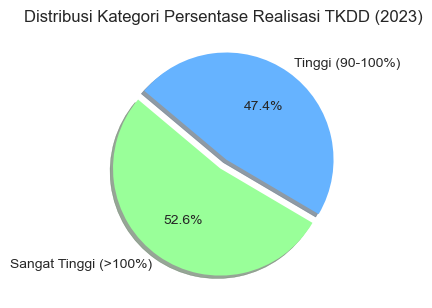

In [101]:
kategori_counts = df['Kategori Realisasi'].value_counts()

color_map = {
    'Rendah (<90%)': '#ff9999',
    'Tinggi (90-100%)': '#66b3ff',
    'Sangat Tinggi (>100%)': '#99ff99'
}
colors = [color_map[kategori] for kategori in kategori_counts.index]

explode = [0.05] * len(kategori_counts)

plt.figure(figsize=(4, 4))
plt.pie(kategori_counts,
        labels=kategori_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True)

plt.title('Distribusi Kategori Persentase Realisasi TKDD (2023)')
plt.tight_layout()
plt.show()


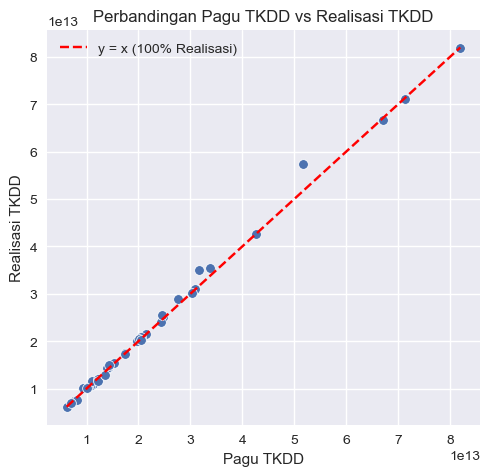

In [102]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Pagu TKDD', y='Realisasi TKDD', data=df)
plt.plot([df['Pagu TKDD'].min(), df['Pagu TKDD'].max()],
         [df['Pagu TKDD'].min(), df['Pagu TKDD'].max()],
         color='red', linestyle='--', label='y = x (100% Realisasi)')
plt.title('Perbandingan Pagu TKDD vs Realisasi TKDD')
plt.xlabel('Pagu TKDD')
plt.ylabel('Realisasi TKDD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📌 *Insight*:

1. **Sebaran Realisasi TKDD Didominasi oleh Provinsi yang Melebihi Target**  
   Berdasarkan klasifikasi:
   - Sebanyak **20 provinsi (≈53%)** termasuk dalam kategori **Sangat Tinggi (>100%)**, menandakan bahwa realisasi anggaran mereka **melampaui pagu yang ditetapkan**.
   - Sisanya **18 provinsi (≈47%)** berada pada kategori **Tinggi (90–100%)**, yaitu realisasi hampir menyentuh 100%.

   Tidak ada provinsi dengan realisasi di bawah 90%, yang menunjukkan bahwa **pengelolaan dan penyerapan dana TKDD di tahun 2023 secara umum cukup baik**.

1. **Scatter Plot Pagu vs Realisasi Menunjukkan Hubungan yang Sejalan**  
   Plot antara `Pagu TKDD` dan `Realisasi TKDD` membentuk **garis miring mendekati y = x**, yang berarti:
   - Semakin besar pagu yang diberikan, maka cenderung semakin besar pula realisasi anggarannya.
   - Titik-titik data sebagian besar **berada di sekitar atau di atas garis merah putus-putus (y = x)**, yang menandakan bahwa **target realisasi umumnya tercapai bahkan terlampaui**.

   Ini menguatkan insight bahwa **alokasi dan serapan anggaran berjalan linier dan efisien secara nasional**, meskipun perlu ditelusuri lebih dalam untuk provinsi dengan deviasi terbesar dari garis tersebut.


---

## **2.2 Provinsi dengan Realisasi TKDD Terendah dan Tertinggi**

### *Pertanyaan* :  
Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah?

### *Langkah Analisis* :
- Mengurutkan Data :  Data diurutkan berdasarkan:
     - Nilai nominal realisasi (`Realisasi TKDD`) untuk mengetahui provinsi dengan serapan anggaran terbesar dan terkecil secara absolut.
     - Persentase realisasi (`Persentase Realisasi TKDD`) untuk mengukur efektivitas penyerapan anggaran terhadap target.



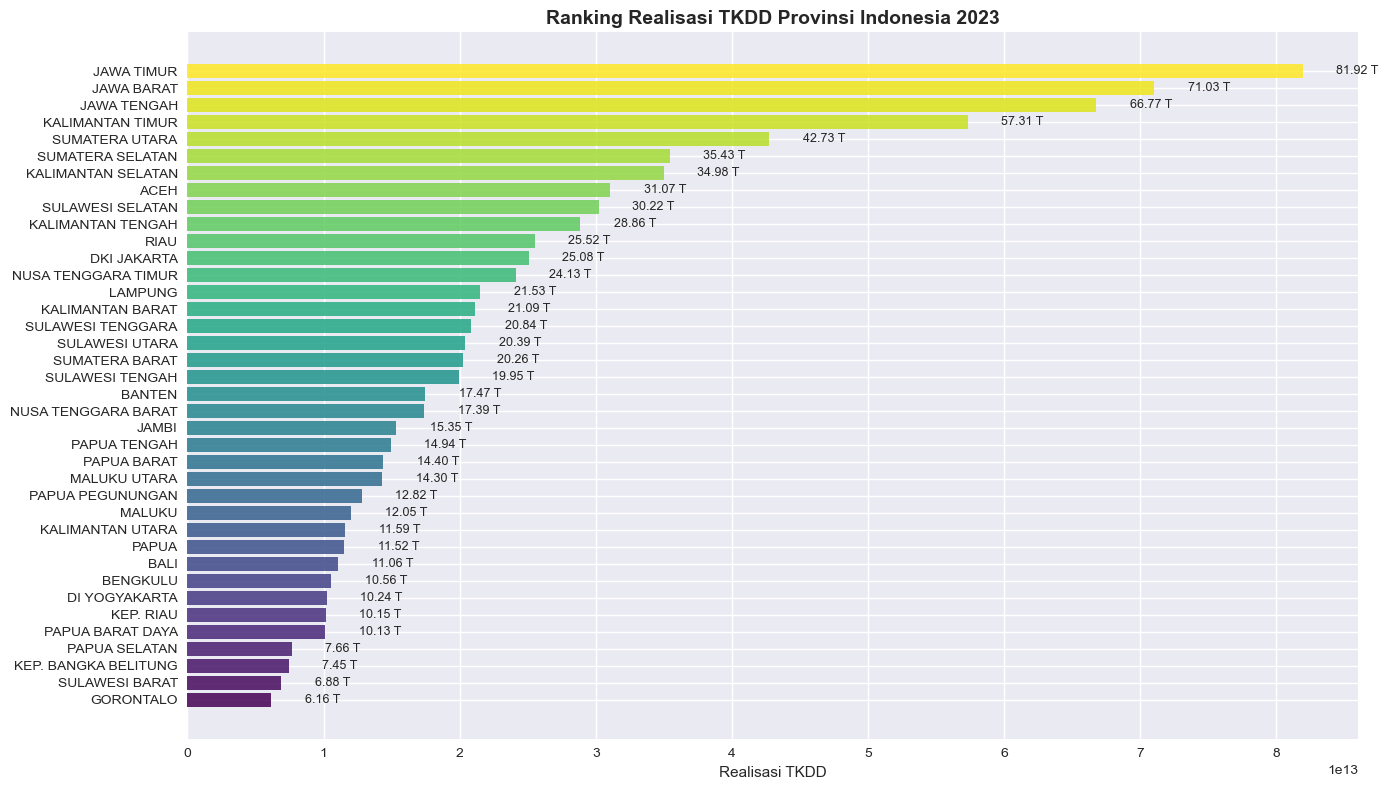


Provinsi dengan Realisasi TKDD tertinggi: JAWA TIMUR (81,921,890,000,000.00)
Provinsi dengan Realisasi TKDD terendah: GORONTALO (6,155,410,000,000.00)


In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Urutkan data berdasarkan Realisasi TKDD (terendah ke tertinggi)
df_sorted = df.sort_values('Realisasi TKDD', ascending=True).reset_index(drop=True)

plt.figure(figsize=(14, 8))

# Buat warna gradasi (1 warna per bar)
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted)))

bars = plt.barh(
    y=range(len(df_sorted)),
    width=df_sorted['Realisasi TKDD'],
    color=colors,
    alpha=0.85
)

plt.yticks(ticks=range(len(df_sorted)), labels=df_sorted['Provinsi'])
plt.xlabel('Realisasi TKDD')
plt.title('Ranking Realisasi TKDD Provinsi Indonesia 2023', fontsize=14, fontweight='bold')

for i, (bar, value) in enumerate(zip(bars, df_sorted['Realisasi TKDD'])):
    plt.text(
        bar.get_width() + 0.03 * df_sorted['Realisasi TKDD'].max(),  # beri jarak dinamis
        bar.get_y() + bar.get_height() / 2,
        f'{value/1e12:.2f} T',  # ubah ke satuan triliun dan tampilkan 2 desimal
        va='center',
        ha='left',
        fontsize=9
    )


plt.tight_layout()
plt.show()

# Cetak provinsi dengan realisasi TKDD tertinggi dan terendah
prov_tinggi = df.loc[df['Realisasi TKDD'].idxmax(), 'Provinsi']
nilai_tinggi = df['Realisasi TKDD'].max()

prov_rendah = df.loc[df['Realisasi TKDD'].idxmin(), 'Provinsi']
nilai_rendah = df['Realisasi TKDD'].min()

print(f"\nProvinsi dengan Realisasi TKDD tertinggi: {prov_tinggi} ({nilai_tinggi:,.2f})")
print(f"Provinsi dengan Realisasi TKDD terendah: {prov_rendah} ({nilai_rendah:,.2f})")


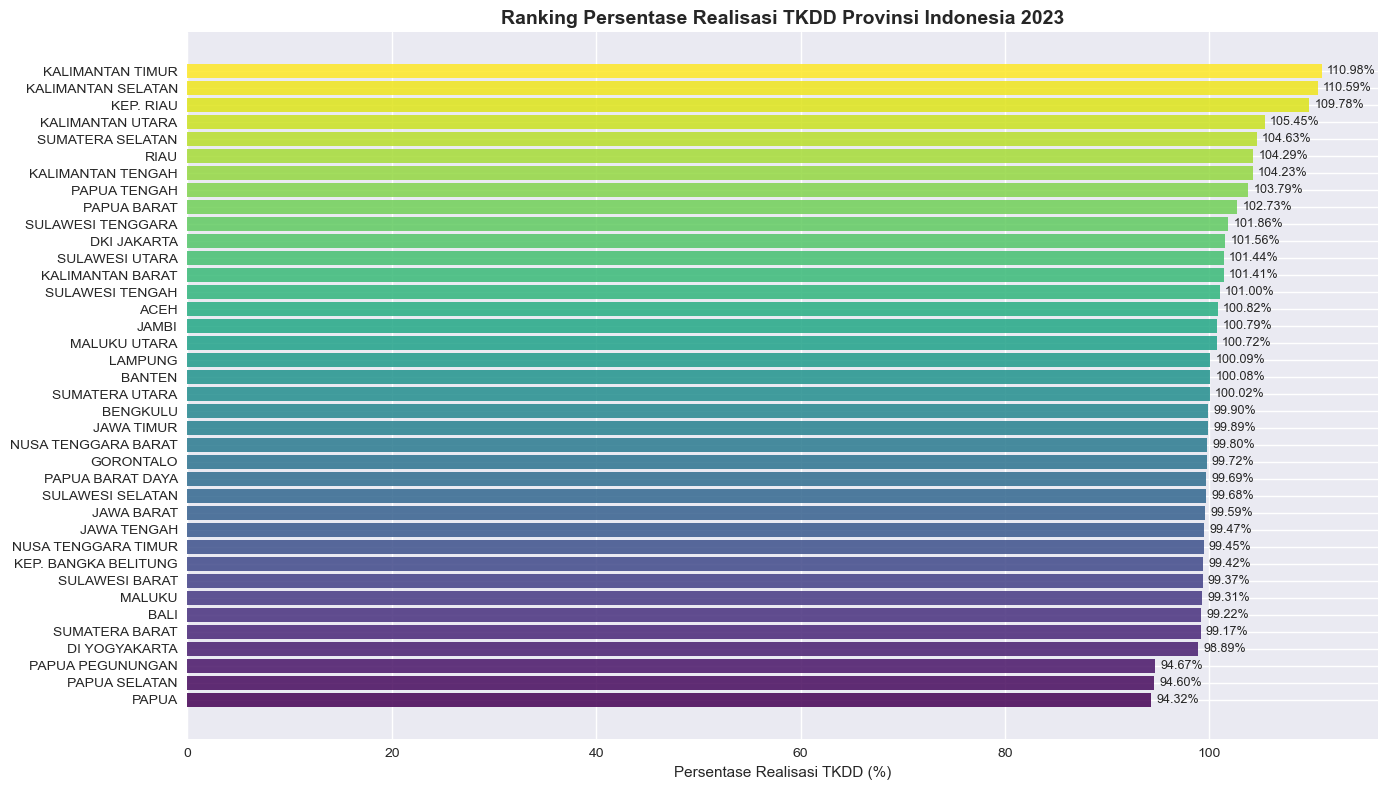


Provinsi dengan Persentase Realisasi TKDD tertinggi: KALIMANTAN TIMUR (110.98%)
Provinsi dengan Persentase Realisasi TKDD terendah: PAPUA (94.32%)


In [104]:
# Urutkan berdasarkan Persentase Realisasi TKDD (dari yang terendah ke tertinggi)
df_sorted = df.sort_values('Persentase Realisasi TKDD', ascending=True).reset_index(drop=True)

plt.figure(figsize=(14, 8))

# Gradasi warna berdasarkan banyaknya provinsi
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted)))

# Buat bar horizontal
bars = plt.barh(
    y=range(len(df_sorted)),
    width=df_sorted['Persentase Realisasi TKDD'],
    color=colors,
    alpha=0.85
)

# Label sumbu Y dan X
plt.yticks(ticks=range(len(df_sorted)), labels=df_sorted['Provinsi'])
plt.xlabel('Persentase Realisasi TKDD (%)')
plt.title('Ranking Persentase Realisasi TKDD Provinsi Indonesia 2023', fontsize=14, fontweight='bold')

# Tambahkan nilai persentase di ujung bar
for bar, val in zip(bars, df_sorted['Persentase Realisasi TKDD']):
    plt.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{val:.2f}%',
        va='center',
        ha='left',
        fontsize=9
    )

plt.tight_layout()
plt.show()

# Tampilkan provinsi tertinggi dan terendah
prov_tinggi = df.loc[df['Persentase Realisasi TKDD'].idxmax(), 'Provinsi']
nilai_tinggi = df['Persentase Realisasi TKDD'].max()

prov_rendah = df.loc[df['Persentase Realisasi TKDD'].idxmin(), 'Provinsi']
nilai_rendah = df['Persentase Realisasi TKDD'].min()

print(f"\nProvinsi dengan Persentase Realisasi TKDD tertinggi: {prov_tinggi} ({nilai_tinggi:.2f}%)")
print(f"Provinsi dengan Persentase Realisasi TKDD terendah: {prov_rendah} ({nilai_rendah:.2f}%)")


### 📌 *Insight* :

- 🟥 **Provinsi dengan Realisasi TKDD Nominal Terendah**  
  Provinsi **Gorontalo** mencatat realisasi TKDD sebesar **Rp6,16 triliun**, menjadi provinsi dengan jumlah anggaran TKDD yang paling kecil secara absolut di antara semua provinsi. Hal ini dapat disebabkan oleh kapasitas fiskal yang lebih kecil serta cakupan geografis dan jumlah penduduk yang relatif rendah.

- 🟩 **Provinsi dengan Realisasi TKDD Nominal Tertinggi**  
  Provinsi **Jawa Timur** memiliki realisasi tertinggi dengan total **Rp81,92 triliun**, mencerminkan skala pemerintahan daerah yang besar, kebutuhan fiskal tinggi, dan populasi yang padat.

- 🟥 **Provinsi dengan Persentase Realisasi TKDD Terendah**  
  Provinsi **Papua** hanya merealisasikan **94,32%** dari total pagu anggaran TKDD. Meskipun tidak masuk kategori “rendah” (<90%), nilai ini menunjukkan bahwa masih terdapat gap serapan anggaran yang bisa diperbaiki. Faktor geografis dan infrastruktur dapat menjadi hambatan realisasi di wilayah ini.

- 🟩 **Provinsi dengan Persentase Realisasi TKDD Tertinggi**  
  Provinsi **Kalimantan Timur** mencatat persentase realisasi sebesar **110,98%**, menandakan bahwa serapan anggaran melampaui target pagu yang ditetapkan. Hal ini bisa menunjukkan adanya kebutuhan tambahan dana, atau perubahan ketetapan pagu di tengah tahun anggaran.

### 🧩 *Kesimpulan* :
Perbandingan antara nilai nominal dan persentase realisasi memberikan dua sudut pandang berbeda:
- **Nominal** menggambarkan kapasitas fiskal dan kebutuhan anggaran masing-masing provinsi.
- **Persentase** menunjukkan efektivitas dan efisiensi penyerapan anggaran terhadap perencanaan.

---

## **2.3 Faktor-Faktor yang Memengaruhi Realisasi TKDD**

### *Pertanyaan*:  
Apa kemungkinan faktor-faktor yang mempengaruhi tinggi-rendahnya realisasi TKDD?

### *Langkah Analisis*:
A. Analisis Bivariat – Korelasi Antar Variabel  
1. Membuat *heatmap* korelasi untuk melihat hubungan antar variabel numerik dengan `Realisasi TKDD`.  
2. Fokus pada korelasi antara variabel independen terhadap variabel target.  

B. Analisis Multivariat – Regresi Linear OLS  
Untuk melihat kontribusi simultan berbagai variabel terhadap `Realisasi TKDD`, dilakukan regresi linear berganda.  
1. Uji Multikolinearitas dengan VIF  
2. Model Regresi OLS   

### **A. Analisis Bivariat**

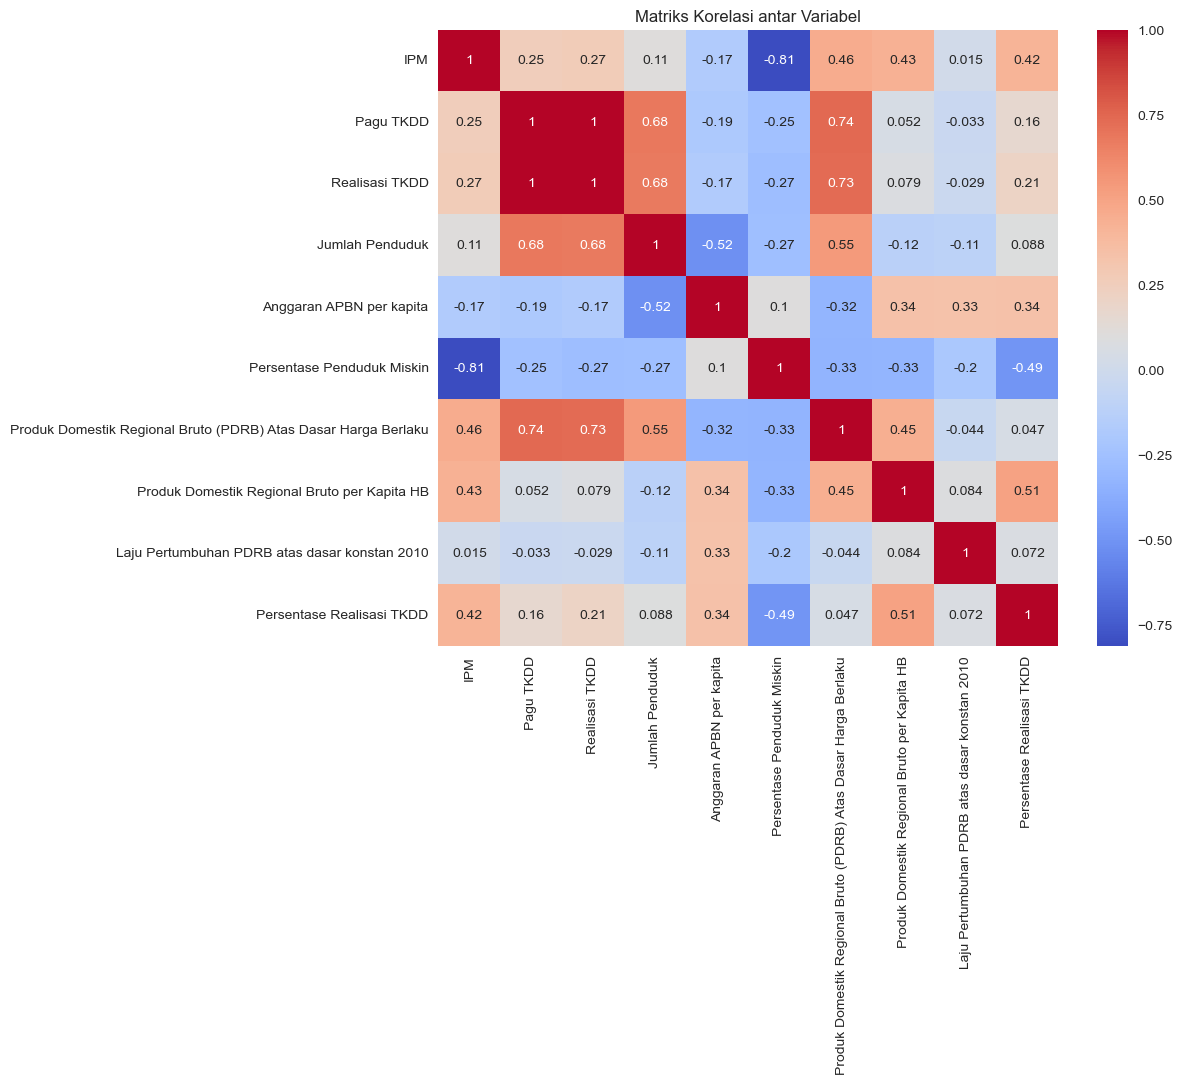

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi antar Variabel')
plt.show()


**Hasil Korelasi terhadap `Realisasi TKDD`:**

| Variabel | Korelasi | Arah |
|----------|----------|------|
| **Pagu TKDD** | 0.998 | Positif sangat kuat |
| **PDRB ADHB** | 0.732 | Positif kuat |
| **Jumlah Penduduk** | 0.676 | Positif |
| **IPM** | 0.267 | Positif lemah |
| **Persentase Realisasi TKDD** | 0.210 | Positif sangat lemah |
| **PDRB per Kapita** | 0.079 | Positif sangat lemah |
| **Laju Pertumbuhan PDRB** | -0.029 | Negatif sangat lemah |
| **Anggaran APBN per Kapita** | -0.167 | Negatif lemah |
| **Persentase Penduduk Miskin** | -0.267 | Negatif lemah |
| **Selisih TKDD** | -0.287 | Negatif lemah |

Berdasarkan hasil heatmap korelasi antar variabel numerik, berikut adalah variabel-variabel dengan hubungan paling menonjol terhadap `Realisasi TKDD`:

#### 📈 Korelasi Positif Tertinggi:
1. **Pagu TKDD** → **0.998**  
   Hubungan sangat kuat dan hampir linier. Namun, karena ini adalah komponen utama dari Realisasi itu sendiri.

2. **PDRB ADHB (Harga Berlaku)** → **0.732**  
   Menunjukkan bahwa provinsi dengan nilai ekonomi besar cenderung memiliki realisasi TKDD yang tinggi.

3. **Jumlah Penduduk** → **0.676**  
   Populasi yang besar cenderung membutuhkan belanja publik yang lebih tinggi, sehingga berdampak positif terhadap tingginya realisasi anggaran.

#### 📉 Korelasi Negatif:
2. **Persentase Penduduk Miskin** → **-0.267**  
    Meskipun daerah dengan jumlah penduduk miskin yang tinggi seharusnya menerima realisasi TKDD yang lebih besar, data menunjukkan adanya korelasi negatif antara tingkat kemiskinan dan realisasi TKDD. Hal ini kemungkinan disebabkan oleh tantangan dalam penyerapan anggaran, baik karena keterbatasan kapasitas kelembagaan maupun infrastruktur pendukung. Namun, korelasi yang terdeteksi tergolong lemah, sehingga belum sepenuhnya mencerminkan kondisi sebenarnya di lapangan.

3. **Anggaran APBN per Kapita** → **-0.167**  
   Mengindikasikan bahwa daerah dengan alokasi anggaran per kapita yang besar tidak selalu mampu merealisasikan anggarannya secara optimal. Namun, karena nilai korelasi ini tergolong lemah, maka hubungan tersebut tidak cukup kuat untuk dijadikan dasar kesimpulan.

### **B. Analisis Multivariat**

Beberapa variabel dalam analisis bivariat menunjukkan hubungan yang **lemah**, terutama yang bersifat **negatif**. Hal ini menunjukkan bahwa korelasi sederhana hanya mampu mengukur **hubungan antar dua variabel secara terpisah**, tanpa mempertimbangkan interaksi antar variabel lainnya. Padahal, dalam konteks realisasi TKDD, kemungkinan **berbagai faktor saling berinteraksi secara simultan** dan kompleks. 

👉 Oleh karena itu, untuk memperoleh pemahaman yang lebih menyeluruh dan mengukur **kontribusi masing-masing variabel secara bersamaan**, dilakukan **analisis multivariat** menggunakan model **regresi linear (Ordinary Least Squares / OLS)** pada tahap berikutnya. Untuk memastikan keandalan model, juga dilakukan uji **Variance Inflation Factor (VIF)** guna mendeteksi dan menghindari masalah **multikolinearitas** di antara variabel independen, sehingga hasil estimasi menjadi lebih valid.

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = df[['IPM', 'Jumlah Penduduk', 'Pagu TKDD', 'Anggaran APBN per kapita', 
        'Persentase Penduduk Miskin', 
        'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
        'Produk Domestik Regional Bruto per Kapita HB', 
        'Laju Pertumbuhan PDRB atas dasar konstan 2010']]

y = df['Realisasi TKDD']

X = sm.add_constant(X) 

**1. Uji Multikolinearitas dengan VIF**

Sebelum membangun model regresi linear, dilakukan uji multikolinearitas menggunakan nilai **VIF (Variance Inflation Factor)** untuk memastikan bahwa variabel independen **tidak saling berkorelasi terlalu tinggi**, yang dapat mengganggu kestabilan model.

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)

                                            Variable       VIF
0                                              const  0.000000
1                                                IPM  5.006169
2                                    Jumlah Penduduk  2.670606
3                                          Pagu TKDD  5.365626
4                           Anggaran APBN per kapita  3.271180
5                         Persentase Penduduk Miskin  4.456461
6  Produk Domestik Regional Bruto (PDRB) Atas Das...  6.668623
7       Produk Domestik Regional Bruto per Kapita HB  3.655768
8      Laju Pertumbuhan PDRB atas dasar konstan 2010  1.239419


c:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


HASIL UJI

| No. | Variabel                                               | VIF   | Interpretasi                                       |
|-----|--------------------------------------------------------|-------|----------------------------------------------------|
| 1   | **PDRB ADHB**                                          | 6.67  | Multikolinearitas tinggi     |
| 2   | **Pagu TKDD**                                          | 5.37  | Multikolinearitas tinggi |
| 3   | **IPM**                                                | 5.01  | Ambang atas          |
| 4   | Produk Domestik Regional Bruto **per Kapita**          | 3.66  | Masih dalam batas wajar                           |
| 5   | Anggaran APBN **per Kapita**                           | 3.27  | Wajar                                              |
| 6   | Persentase Penduduk Miskin                             | 4.46  | Perlu perhatian                                    |
| 7   | Jumlah Penduduk                                        | 2.67  | Wajar                                              |
| 8   | Laju Pertumbuhan PDRB (Konstan 2010)                   | 1.24  | Tidak ada multikolinearitas                       |


   🔍 *Interpretasi:*

   - **VIF > 5** mengindikasikan potensi **multikolinearitas tinggi**, artinya variabel tersebut memiliki korelasi kuat dengan variabel independen lain.
   - Dalam hal ini, **PDRB ADHB**, **Pagu TKDD**, dan **IPM** memiliki VIF di atas 5.
   - Oleh karena itu, **Pagu TKDD dan PDRB ADHB tidak akan digunakan pada model regresi OLS**, karena VIF-nya cukup tinggi dan bisa menyebabkan distorsi pada estimasi koefisien.
   - Variabel lain seperti **Jumlah Penduduk**, **Anggaran APBN per Kapita**, dan **Laju Pertumbuhan PDRB** memiliki nilai VIF yang masih dalam batas aman (< 5), sehingga **tetap digunakan dalam model OLS**.


   ⁉️ *Kenapa Multikolinearitas Penting?*

   Jika dua atau lebih variabel independen sangat berkorelasi, maka:
   - Koefisien regresi bisa menjadi **tidak stabil** (berubah drastis meski data berubah sedikit).
   - Nilai **p-value menjadi tidak akurat**, sehingga sulit menentukan signifikansi variabel.
   - Model menjadi **sulit diinterpretasi** karena efek variabel saling menutupi satu sama lain.

   Dengan menggunakan uji VIF ini, model regresi yang dibangun menjadi **lebih valid, stabil, dan interpretable**.


**2. Regresi Linear OLS**

Setelah dilakukan uji multikolinearitas menggunakan VIF, diputuskan bahwa variabel **Pagu TKDD** dan **PDRB ADHB (Harga Berlaku)** tidak disertakan dalam model karena memiliki nilai VIF yang tinggi (di atas 5), yang berisiko menyebabkan **multikolinearitas** dalam model regresi.

    👉 Oleh karena itu, model regresi linear dibangun dengan menggunakan variabel-variabel berikut:

    - Indeks Pembangunan Manusia (IPM)
    - Jumlah Penduduk
    - Anggaran APBN per Kapita
    - Persentase Penduduk Miskin
    - Produk Domestik Regional Bruto per Kapita
    - Laju Pertumbuhan PDRB atas dasar konstan 2010

Model ini bertujuan untuk **mengukur kontribusi masing-masing variabel secara simultan** terhadap besarnya **Realisasi TKDD** di setiap provinsi, dengan hasil yang lebih akurat dan bebas dari gangguan korelasi antar variabel independen.



In [ ]:

X = df[['IPM', 'Jumlah Penduduk', 'Anggaran APBN per kapita', 
        'Persentase Penduduk Miskin', 
        'Produk Domestik Regional Bruto per Kapita HB', 
        'Laju Pertumbuhan PDRB atas dasar konstan 2010']]

y = df['Realisasi TKDD']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()

model_summary = model.summary()
print("\n--- Hasil Regresi Linear OLS ---")
print(model_summary)
print("\nAnalisis selesai.")


--- Hasil Regresi Linear OLS ---
                            OLS Regression Results                            
Dep. Variable:         Realisasi TKDD   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     7.610
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           4.47e-05
Time:                        23:24:01   Log-Likelihood:                -1196.6
No. Observations:                  38   AIC:                             2407.
Df Residuals:                      31   BIC:                             2419.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

### HASIL ANALISIS REGRESI LINEAR DENGAN OLS

| Variabel                       | Koefisien (`coef`)   | P-Value          | Signifikansi          | Interpretasi                                                                                                                                                 |
| ------------------------------ | ------------------ | --------- | --------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **IPM**                        | +2.357 triliun     | 0.019 ✅   | **Signifikan**        | Setiap kenaikan 1 poin IPM diperkirakan akan meningkatkan realisasi TKDD sebesar Rp 2,36 triliun, yang mengindikasikan bahwa daerah dengan kualitas hidup yang lebih tinggi cenderung menerima alokasi dana yang lebih besar.   |
| **Jumlah Penduduk**            | +1.148 juta        | < 0.001 ✅ | **Sangat signifikan** | Secara logis, daerah dengan jumlah penduduk yang lebih besar akan memperoleh alokasi dana yang lebih tinggi dari pemerintah pusat.                      |
| **Anggaran APBN per kapita**   | +1.838 juta        | 0.026 ✅   | **Signifikan**        | Dana APBN per kapita menunjukkan seberapa besar perhatian fiskal pemerintah pusat terhadap kebutuhan individu di suatu daerah. Jika anggarannya besar per orang, maka wajar jika total dana TKDD direalisasikan juga besar. |
| **Persentase Penduduk Miskin** | +1.093 triliun     | 0.099 ❗   | **Hampir signifikan** | Artinya, setiap kenaikan 1% penduduk miskin berpotensi menaikkan realisasi TKDD sebesar Rp 1.09 triliun. Masuk akal secara kebijakan afirmatif. Tapi signifikansi masih lemah. |
| **PDRB per Kapita HB**         | –18.74 ribu        | 0.674     | ❌ Tidak signifikan    | Daerah yang pendapatan per kapitanya tinggi justru cenderung mendapat realisasi TKDD **lebih rendah**, tapi secara statistik tidak signifikan.                                   |
| **Laju Pertumbuhan PDRB**      | +76.97 miliar      | 0.924     | ❌ Tidak signifikan    | Kinerja pertumbuhan ekonomi **tidak berdampak signifikan** pada alokasi dana dari pusat. Koefisien kecil dan p-value tinggi.                                                   |


## 📌 Insight & Kesimpulan Akhir

### *1. Korelasi Sederhana: Hubungan Dua Variabel*
- **Realisasi TKDD sangat berkorelasi dengan Pagu TKDD** (0.998), karena keduanya memang bagian dari satu sistem alokasi dan pelaksanaan anggaran.
- Korelasi kuat lainnya ditemukan pada:
  - **PDRB ADHB** (0.732)
  - **Jumlah Penduduk** (0.676)
- Variabel lain seperti:
  - **IPM** (0.267)
  - **Anggaran APBN per Kapita** (-0.167)
  - **Persentase Penduduk Miskin** (-0.267)  
  menunjukkan korelasi yang lebih lemah namun tetap relevan untuk ditelusuri lebih dalam.


### *2. Uji Multikolinearitas (VIF): Stabilitas Model*
- **Pagu TKDD** dan **PDRB ADHB** memiliki nilai VIF di atas 5 → dikeluarkan dari model regresi untuk menghindari multikolinearitas.
- Variabel yang lolos uji dan digunakan dalam regresi:
  - **IPM**
  - **Jumlah Penduduk**
  - **Anggaran APBN per Kapita**
  - **Persentase Penduduk Miskin**
  - **PDRB per Kapita**
  - **Laju Pertumbuhan PDRB**


### *3. Regresi Linear (OLS): Analisis Pengaruh Simultan*
Hasil regresi menunjukkan bahwa **beberapa variabel berpengaruh signifikan terhadap Realisasi TKDD**, bahkan setelah dikontrol secara simultan:

- ✅ **Jumlah Penduduk** → pengaruh positif dan sangat signifikan  
- ✅ **IPM** → pengaruh positif dan signifikan  
- ✅ **Anggaran APBN per Kapita** → pengaruh positif dan signifikan  
- ⚠️ **Persentase Penduduk Miskin** → pengaruh positif namun kurang signifikan  
- ❌ **PDRB per Kapita** dan **Laju Pertumbuhan PDRB** → tidak signifikan  


### **Urutan Faktor yang Paling Mempengaruhi Realisasi TKDD:**

Dari hasil gabungan **analisis bivariat dan multivariat**, berikut adalah urutan kekuatan pengaruh terhadap realisasi TKDD (dari paling besar hingga kecil):

1. **Pagu TKDD** *(dikeluarkan dari regresi, namun korelasinya sangat kuat → secara logis menjadi dasar realisasi)*
2. **PDRB ADHB (Harga Berlaku)** *(dikeluarkan dari model karena VIF tinggi, namun tetap signifikan secara korelasi)*
3. ✅ **Jumlah Penduduk**
4. ✅ **IPM (Indeks Pembangunan Manusia)**
5. ✅ **Anggaran APBN per Kapita**
6. ⚠️ **Persentase Penduduk Miskin**
7. ❌ **PDRB per Kapita**
8. ❌ **Laju Pertumbuhan PDRB**

Hasil dari analisis bivariat dan multivariat secara umum **saling mendukung**, memperkuat keyakinan bahwa faktor-faktor yang ditemukan memang berkontribusi nyata terhadap besarnya realisasi anggaran.
Temuan ini penting untuk menjadi dasar evaluasi dan perencanaan distribusi anggaran daerah yang **berbasis kebutuhan nyata dan kapasitas riil masing-masing provinsi**.

---
## **2.4 Hubungan antara Realisasi TKDD dan IPM**

### *Pertanyaan*:  
Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?

### *Langkah Analisis*:
1. Meninjau Hasil Analisis Sebelumnya
2. Membuat Scatter Plot antara Realisasi TKDD & IPM

--- Hasil Analisis Statistik Perbandingan ---
Hubungan Realisasi TKDD (Absolut) vs IPM:
  - Korelasi: 0.267
  - R-squared: 0.071

Hubungan Persentase Realisasi TKDD vs IPM:
  - Korelasi: 0.419
  - R-squared: 0.176


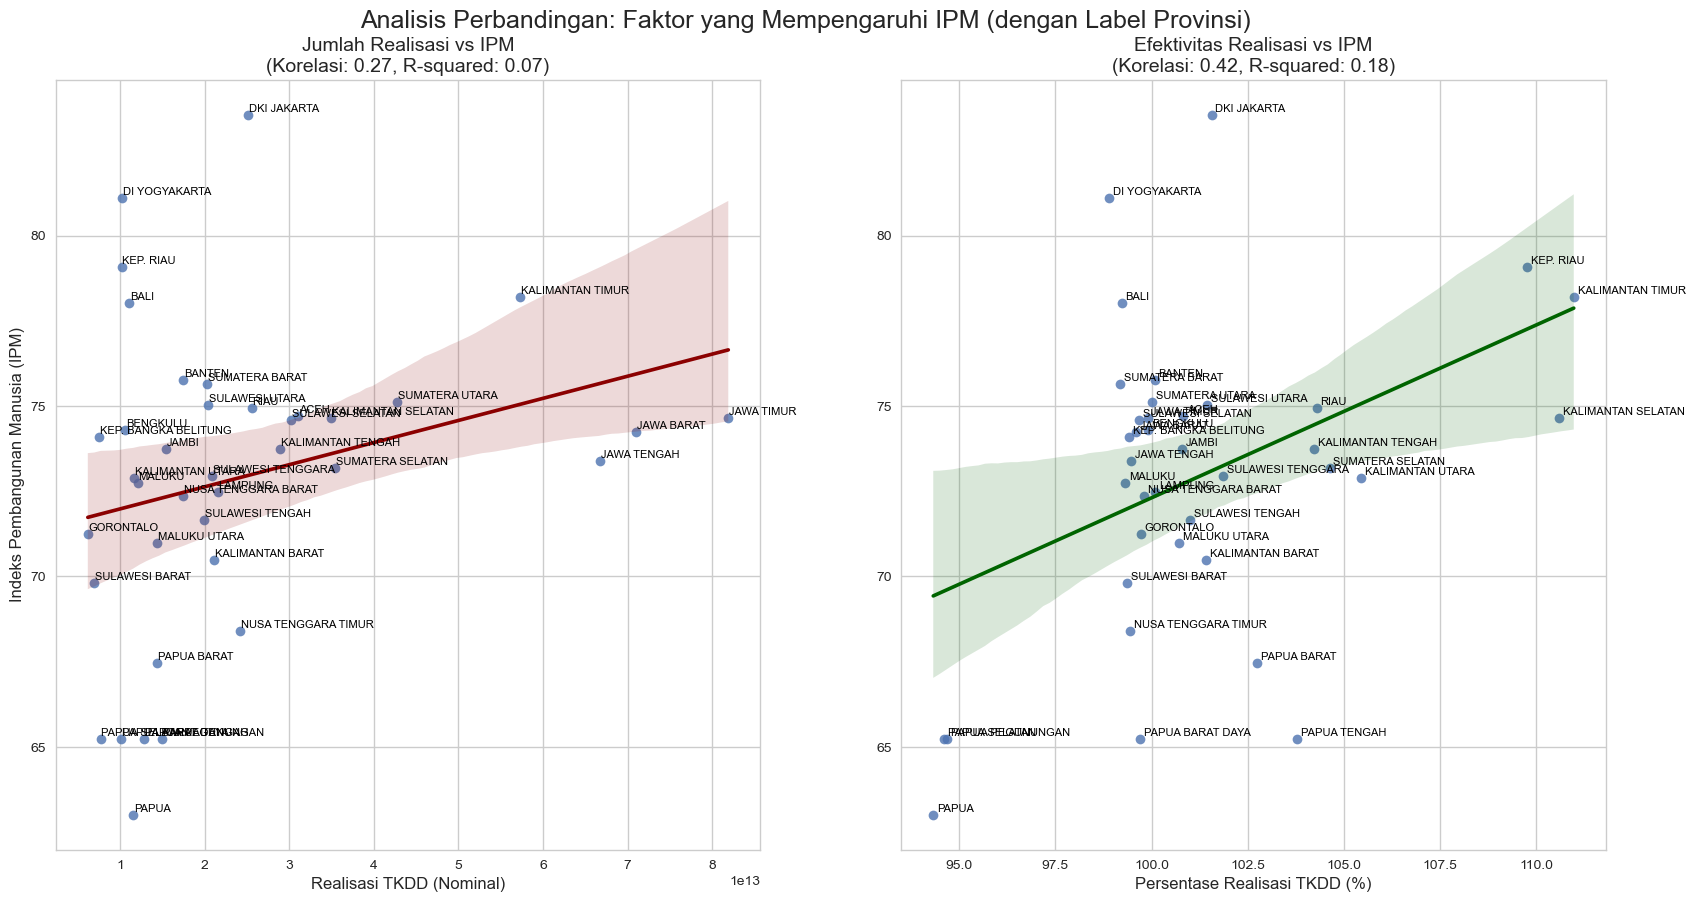

In [ ]:
X1 = df['Realisasi TKDD']
y = df['IPM']
r_squared_abs = X1.corr(y)**2
corr_abs = X1.corr(y)

X2 = df['Persentase Realisasi TKDD']
r_squared_pct = X2.corr(y)**2
corr_pct = X2.corr(y)

print("--- Hasil Analisis Statistik Perbandingan ---")
print(f"Hubungan Realisasi TKDD (Absolut) vs IPM:")
print(f"  - Korelasi: {corr_abs:.3f}")
print(f"  - R-squared: {r_squared_abs:.3f}")
print(f"\nHubungan Persentase Realisasi TKDD vs IPM:")
print(f"  - Korelasi: {corr_pct:.3f}")
print(f"  - R-squared: {r_squared_pct:.3f}")

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.regplot(data=df, x='Realisasi TKDD', y='IPM', ax=ax1, line_kws={'color': 'darkred'})
ax1.set_title(f'Jumlah Realisasi vs IPM\n(Korelasi: {corr_abs:.2f}, R-squared: {r_squared_abs:.2f})', fontsize=14)
ax1.set_xlabel('Realisasi TKDD (Nominal)', fontsize=12)
ax1.set_ylabel('Indeks Pembangunan Manusia (IPM)', fontsize=12)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(13,13))

sns.regplot(data=df, x='Persentase Realisasi TKDD', y='IPM', ax=ax2, line_kws={'color': 'darkgreen'})
ax2.set_title(f'Efektivitas Realisasi vs IPM\n(Korelasi: {corr_pct:.2f}, R-squared: {r_squared_pct:.2f})', fontsize=14)
ax2.set_xlabel('Persentase Realisasi TKDD (%)', fontsize=12)
ax2.set_ylabel('')

for i in range(df.shape[0]):
    ax1.text(x=df['Realisasi TKDD'][i]+0.01e13,
             y=df['IPM'][i]+0.1, 
             s=df['Provinsi'][i], 
             fontdict=dict(color='black', size=8))

for i in range(df.shape[0]):
    ax2.text(x=df['Persentase Realisasi TKDD'][i]+0.1,
             y=df['IPM'][i]+0.1, 
             s=df['Provinsi'][i],
             fontdict=dict(color='black', size=8))

plt.suptitle('Analisis Perbandingan: Faktor yang Mempengaruhi IPM (dengan Label Provinsi)', fontsize=18, y=0.95)
plt.show()

### *Interpretasi Visualisasi: Realisasi TKDD vs IPM*

Visualisasi di atas menampilkan **scatter plot** yang memetakan hubungan antara **Indeks Pembangunan Manusia (IPM)** dan dua pendekatan Realisasi TKDD: nominal (jumlah dana yang direalisasikan) dan persentase (efektivitas penyerapan anggaran).

Hasil analisis menunjukkan bahwa:
- **Hubungan antara IPM dan persentase realisasi TKDD** memiliki korelasi lebih kuat (**0.42**) dibandingkan dengan hubungan IPM dan nominal realisasi (**0.27**).
- Artinya, **efektivitas penyerapan anggaran (kualitas eksekusi)** lebih berdampak terhadap capaian IPM daripada sekadar besarnya dana yang dikucurkan.

Sebagai contoh:
- **DI Yogyakarta** berhasil mencapai IPM tinggi meskipun realisasi TKDD-nya tidak sebesar provinsi lain, menunjukkan efisiensi dan kualitas pengelolaan anggaran yang baik.
- Sebaliknya, provinsi dengan dana besar tetapi rendah dalam efektivitas penyerapan cenderung tidak optimal dalam meningkatkan IPM-nya.

👉 Dengan demikian, **kemampuan manajerial dan tata kelola fiskal daerah** dalam mengeksekusi anggaran menjadi faktor yang lebih krusial dibanding hanya besaran nominal anggaran itu sendiri.

### *Hubungan Timbal Balik antara IPM dan Realisasi TKDD*

Selain dari hasil korelasi dan visualisasi, **analisis regresi OLS** sebelumnya juga menunjukkan adanya **hubungan** antara IPM dan Realisasi TKDD. Dalam model tersebut, ditemukan bahwa:

> **Setiap kenaikan 1 poin IPM diperkirakan akan meningkatkan Realisasi TKDD sebesar Rp 2,36 triliun.**

Hal ini mengindikasikan bahwa **daerah dengan kualitas hidup yang lebih tinggi (IPM tinggi)** cenderung mendapat kepercayaan fiskal lebih besar dari pemerintah pusat, baik karena kebutuhan belanja publik yang meningkat maupun karena kinerja pengelolaan anggaran yang baik.

Sebaliknya, hasil scatter plot dan korelasi juga menunjukkan bahwa **realisasi anggaran yang tinggi dan efektif** dapat berkontribusi terhadap peningkatan IPM. Dengan kata lain, **kedua variabel ini saling memengaruhi**:

- **IPM naik → realisasi cenderung meningkat**
- **Realisasi efektif → IPM cenderung membaik**

Hubungan ini menunjukkan bahwa **pengelolaan anggaran daerah dan capaian pembangunan manusia tidak bisa dipisahkan**. Keduanya harus berjalan beriringan agar tujuan pembangunan dapat tercapai secara berkelanjutan.


---
## **2.5 Faktor-faktor yang Mempengaruhi IPM Tiap Provinsi**

### *Pertanyaan*:  
Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023? 

### *Langkah Analisis*:
1. Membuat scatter plot 
2. Melihat korelasi setiap variabel terhadap IPM


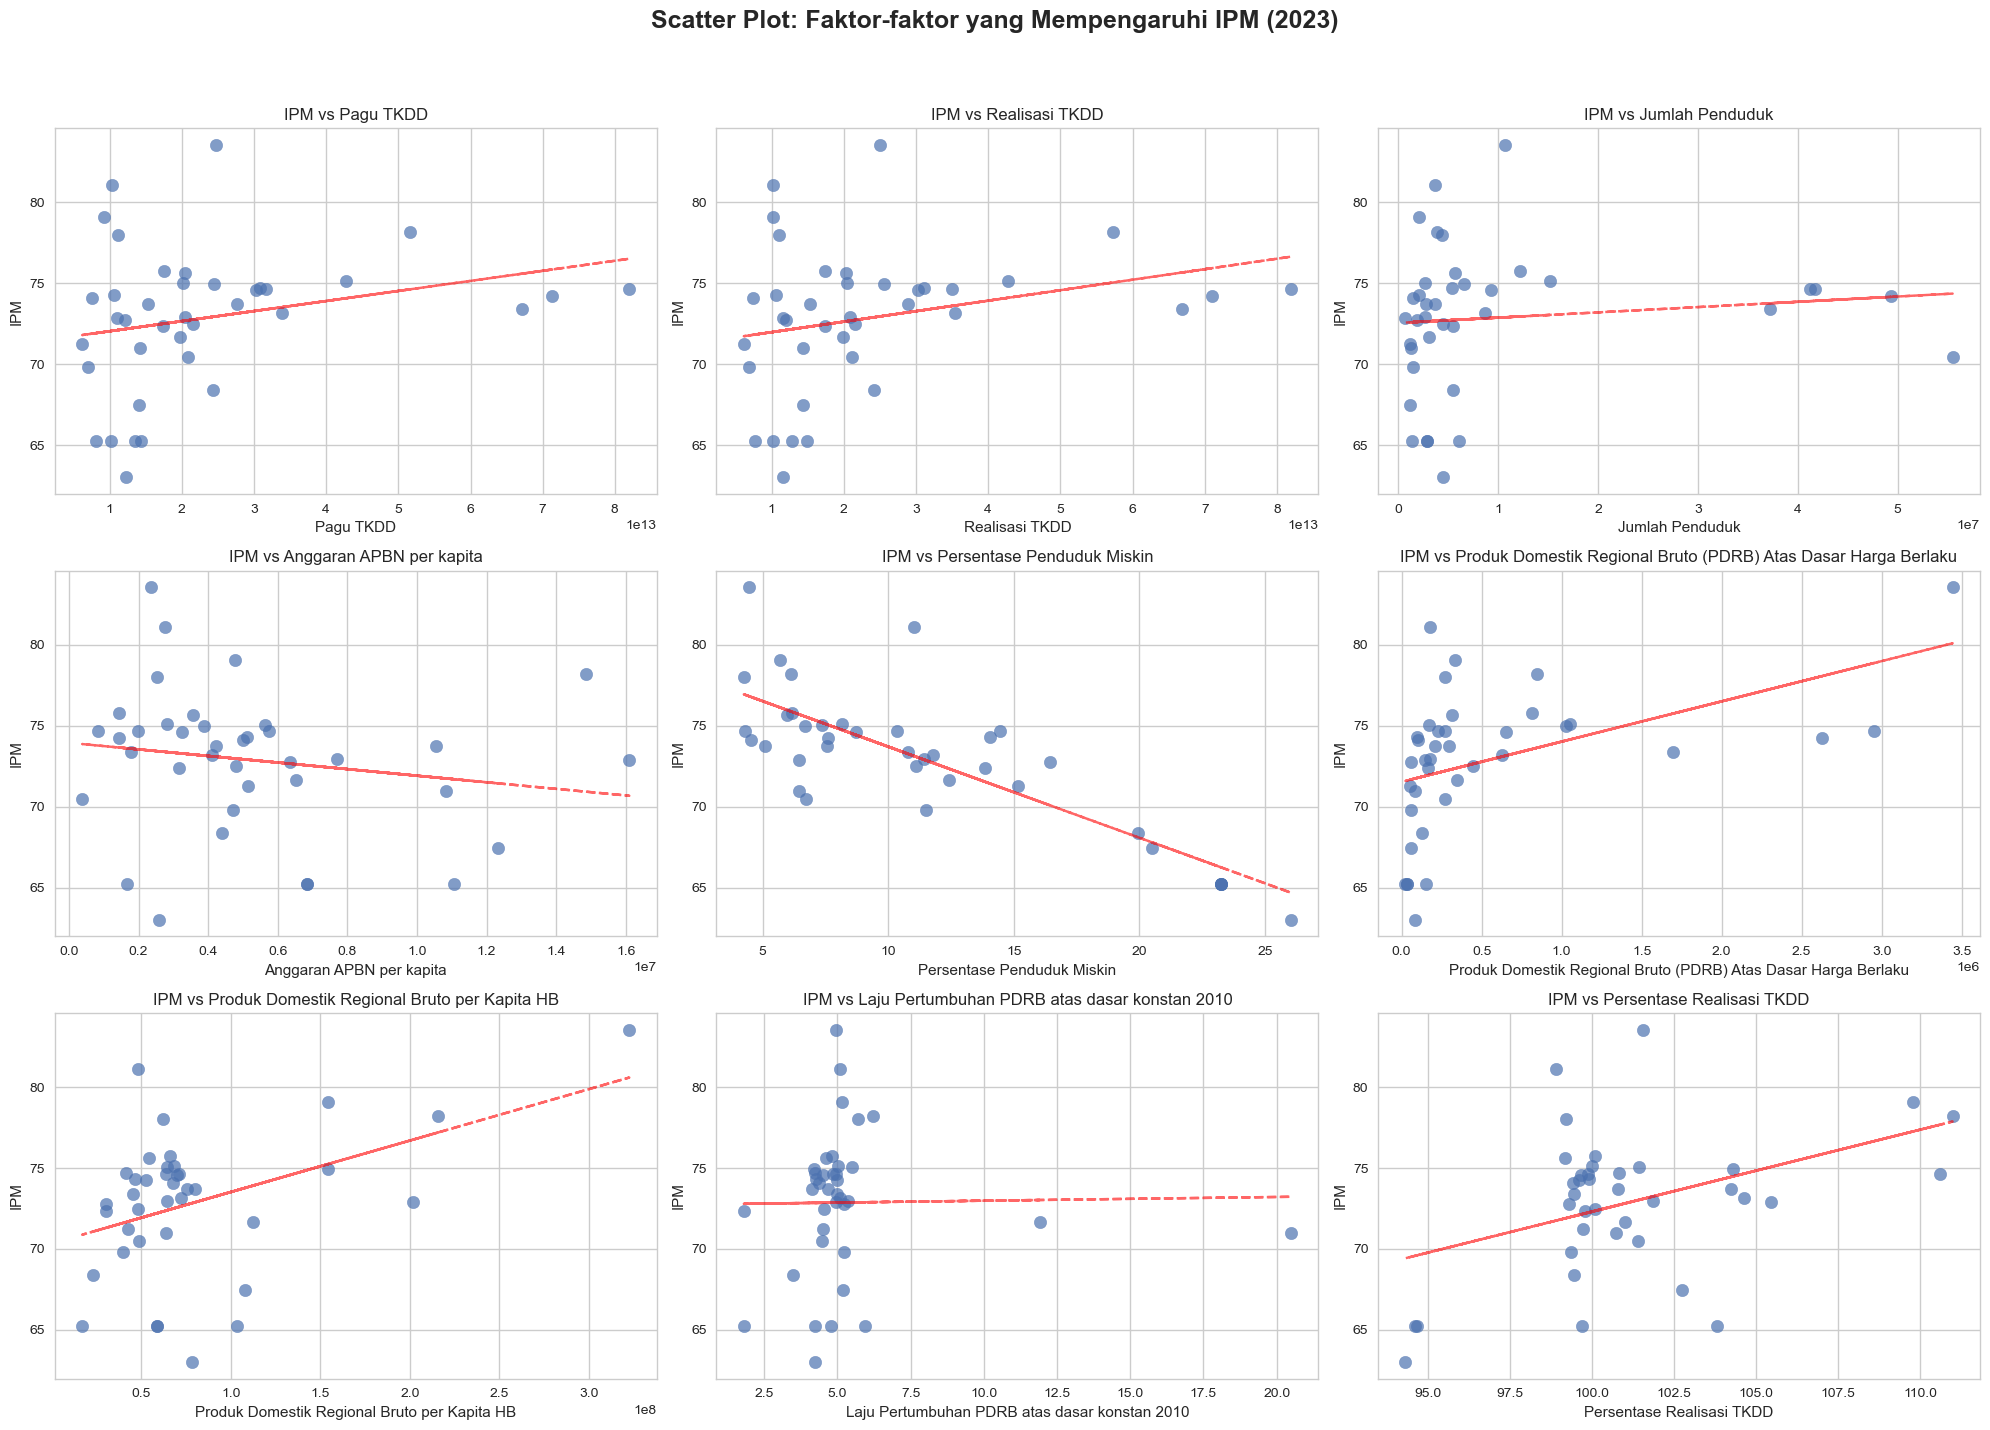

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

numerical_cols = df.select_dtypes(include='number').columns
target = 'IPM'
features = [col for col in numerical_cols if col != target]

n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Scatter Plot: Faktor-faktor yang Mempengaruhi IPM (2023)', fontsize=18, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(features):
    x = df[col]
    y = df[target]
    axes[i].scatter(x, y, alpha=0.7, s=80)
    axes[i].set_title(f'IPM vs {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('IPM')

    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axes[i].plot(x, p(x), "r--", alpha=0.6)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### *Interpretasi Scatter Plot: Faktor-faktor yang Mempengaruhi IPM*

Berdasarkan hasil visualisasi scatter plot antara IPM dan berbagai variabel numerik, diperoleh beberapa temuan penting:

#### ✅ **Faktor dengan Hubungan Positif terhadap IPM:**

1. **PDRB Harga Berlaku dan PDRB per Kapita**  
   Menunjukkan korelasi positif yang cukup kuat. Artinya, semakin besar nilai ekonomi suatu daerah (baik secara total maupun per individu), maka **IPM cenderung meningkat**. Ini menggambarkan bahwa pembangunan ekonomi yang baik turut berdampak pada kualitas hidup.

2. **Persentase Realisasi TKDD**  
   Memberikan pengaruh positif yang cukup signifikan terhadap IPM. Ini mengindikasikan bahwa **efektivitas penyerapan anggaran** jauh lebih penting dibanding hanya besarannya, karena daerah yang mampu menyalurkan dana secara efektif cenderung memiliki kualitas pembangunan manusia yang lebih baik.

3. **Realisasi TKDD (nominal)** dan **Pagu TKDD**  
   Juga berpengaruh positif terhadap IPM, meskipun **dampaknya tidak sekuat** variabel-variabel sebelumnya. Hal ini menunjukkan bahwa **alokasi dana yang besar tidak selalu menjamin peningkatan IPM**, apabila tidak disertai efektivitas penyerapan.

#### 🚫 **Faktor dengan Hubungan Negatif terhadap IPM:**

* **Persentase Penduduk Miskin**  
  Menunjukkan **hubungan negatif yang sangat kuat**. Semakin tinggi tingkat kemiskinan suatu daerah, maka semakin rendah pula indeks pembangunan manusianya. Ini sejalan dengan logika bahwa **kemiskinan yang tinggi menghambat pencapaian pendidikan, kesehatan, dan kesejahteraan**, tiga pilar utama IPM.

### **Kesimpulan Scatter Plot**

* Faktor **ekonomi (PDRB)** dan **efektivitas fiskal (persentase realisasi TKDD)** merupakan **penentu positif utama** dalam meningkatkan IPM.
* **Jumlah dana saja (realisasi/pagu)** belum cukup tanpa kemampuan menyalurkan anggaran secara optimal.
* **Kemiskinan** tetap menjadi hambatan utama dalam pembangunan manusia, dan perlu menjadi perhatian dalam perencanaan alokasi anggaran ke depan.


In [111]:
label_mapping = {
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku': 'PDRB ADHB',
    'Produk Domestik Regional Bruto per Kapita HB': 'PDRB per Kapita',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010': 'Pert. PDRB',
    'Selisih TKDD': 'Selisih TKDD',
    'Persentase Realisasi TKDD': 'Realisasi TKDD (%)',
    'Pagu TKDD': 'Pagu TKDD',
    'Realisasi TKDD': 'Realisasi TKDD'
}

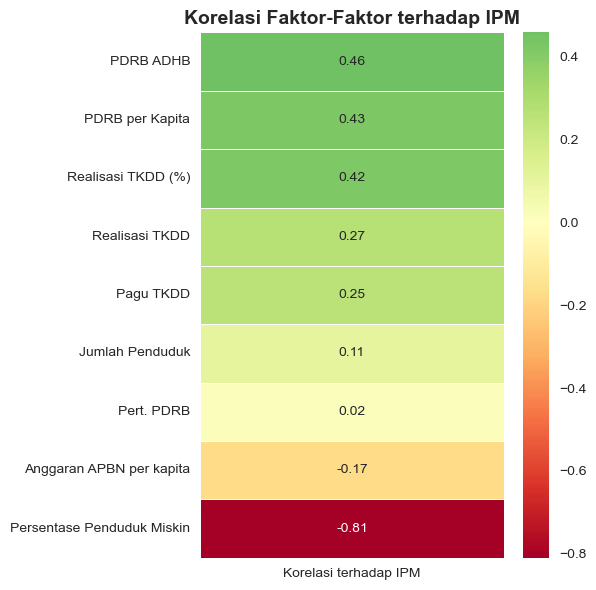

In [112]:
ipm_corr = df.corr(numeric_only=True)['IPM'].drop('IPM').sort_values(ascending=False)

ipm_corr.index = [label_mapping.get(col, col) for col in ipm_corr.index]

ipm_corr_df = ipm_corr.to_frame(name='Korelasi terhadap IPM')

plt.figure(figsize=(6, 6))
sns.heatmap(ipm_corr_df, annot=True, cmap='RdYlGn', center=0, linewidths=0.5, fmt='.2f')

plt.title('Korelasi Faktor-Faktor terhadap IPM', fontsize=14, fontweight='bold')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

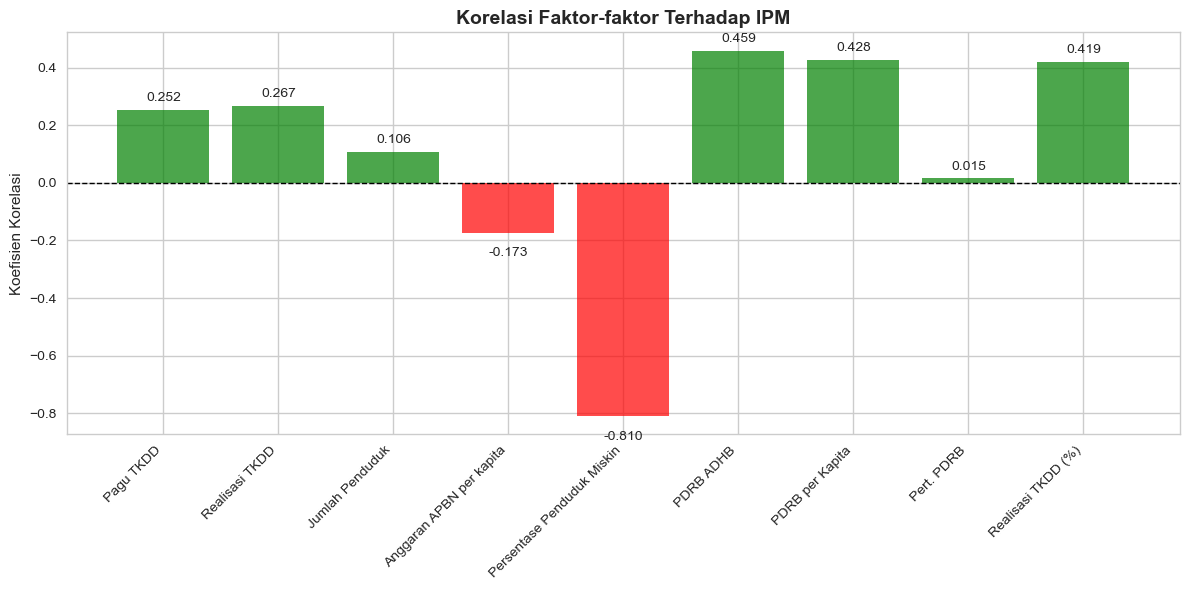

In [113]:
factors_clean = [label_mapping.get(col, col) for col in correlations.index]
corr_values = correlations.values.tolist()
colors = ['green' if val > 0 else 'red' for val in corr_values]

plt.figure(figsize=(12, 6))
bars = plt.bar(factors_clean, corr_values, color=colors, alpha=0.7)

plt.title('Korelasi Faktor-faktor Terhadap IPM', fontsize=14, fontweight='bold')
plt.ylabel('Koefisien Korelasi')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=1, linestyle='--')

for bar, value in zip(bars, corr_values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + (0.02 if value > 0 else -0.05),
             f'{value:.3f}', ha='center',
             va='bottom' if value > 0 else 'top')

plt.tight_layout()
plt.show()

### *Interpretasi Visualisasi: IPM terhadap Variabel Lain*

Berdasarkan analisis korelasi terhadap variabel numerik dalam dataset, berikut adalah hubungan antara **Indeks Pembangunan Manusia (IPM)** dan variabel-variabel lainnya:

| Variabel                                                       | Korelasi | Arah Hubungan          |
|----------------------------------------------------------------|----------|-------------------------|
| **PDRB Atas Dasar Harga Berlaku (ADHB)**                       | 0.459    | Positif sedang          |
| **PDRB per Kapita (ADHB)**                                     | 0.428    | Positif sedang          |
| **Persentase Realisasi TKDD**                                  | 0.419    | Positif sedang          |
| **Realisasi TKDD (nominal)**                                   | 0.267    | Positif lemah           |
| **Pagu TKDD**                                                  | 0.252    | Positif lemah           |
| **Jumlah Penduduk**                                            | 0.106    | Positif sangat lemah    |
| **Laju Pertumbuhan PDRB (Konstan 2010)**                       | 0.015    | Hampir tidak berkorelasi|
| **Anggaran APBN per Kapita**                                   | -0.173   | Negatif lemah           |
| **Persentase Penduduk Miskin**                                 | -0.810   | **Negatif sangat kuat** |

  
- 📈 **Hubungan Positif Sedang** ditemukan antara IPM dan PDRB (baik total maupun per kapita), serta Persentase Realisasi TKDD. Artinya, provinsi dengan ekonomi yang lebih besar dan efektivitas penyerapan anggaran yang baik cenderung memiliki IPM yang lebih tinggi.

- 📉 **Korelasi Negatif Sangat Kuat** terjadi pada **Persentase Penduduk Miskin** dengan IPM (-0.810), yang sepenuhnya masuk akal — semakin tinggi tingkat kemiskinan, semakin rendah IPM suatu daerah.

- 🔍 Beberapa variabel lain seperti **Laju Pertumbuhan PDRB** dan **Jumlah Penduduk** tidak menunjukkan hubungan yang signifikan terhadap IPM.

### **Kesimpulan Akhir: Faktor-Faktor yang Memengaruhi IPM**

Berdasarkan analisis korelasi, berikut adalah poin-poin penting yang dapat disimpulkan:

1. PDRB (Produk Domestik Regional Bruto) — baik total maupun per kapita — menunjukkan hubungan positif sedang terhadap IPM. Ini menandakan bahwa provinsi dengan aktivitas ekonomi yang lebih besar cenderung memiliki indeks pembangunan manusia yang lebih tinggi.

2. Persentase Realisasi TKDD juga berkorelasi positif sedang terhadap IPM, yang menunjukkan bahwa efektivitas penyerapan anggaran daerah turut berperan dalam peningkatan kualitas hidup masyarakat.

3. Realisasi dan Pagu TKDD (nominal) hanya menunjukkan korelasi lemah terhadap IPM. Hal ini menegaskan bahwa jumlah dana saja tidak cukup, melainkan kemampuan dalam mengelola dan menyalurkan anggaran jauh lebih penting untuk mendorong pembangunan manusia.

4. Persentase Penduduk Miskin memiliki korelasi negatif sangat kuat (-0.81) terhadap IPM. Ini artinya, semakin tinggi angka kemiskinan di suatu provinsi, semakin rendah pula nilai IPM-nya. Kemiskinan terbukti menjadi faktor penghambat utama dalam pencapaian pembangunan manusia.

5. Variabel seperti Anggaran APBN per kapita, jumlah penduduk, dan laju pertumbuhan ekonomi memiliki korelasi rendah bahkan nyaris netral terhadap IPM, sehingga pengaruhnya terhadap peningkatan kualitas hidup masih belum terlalu signifikan jika berdiri sendiri.

Dengan demikian, untuk meningkatkan IPM secara menyeluruh, daerah perlu:

1. Mendorong pertumbuhan ekonomi yang inklusif,
2. Meningkatkan efisiensi penyerapan anggaran, dan
3. Mengarahkan kebijakan secara terukur untuk menurunkan tingkat kemiskinan, sebagai fondasi utama peningkatan IPM.


### Ranking Provinsi berdasarkan IPM

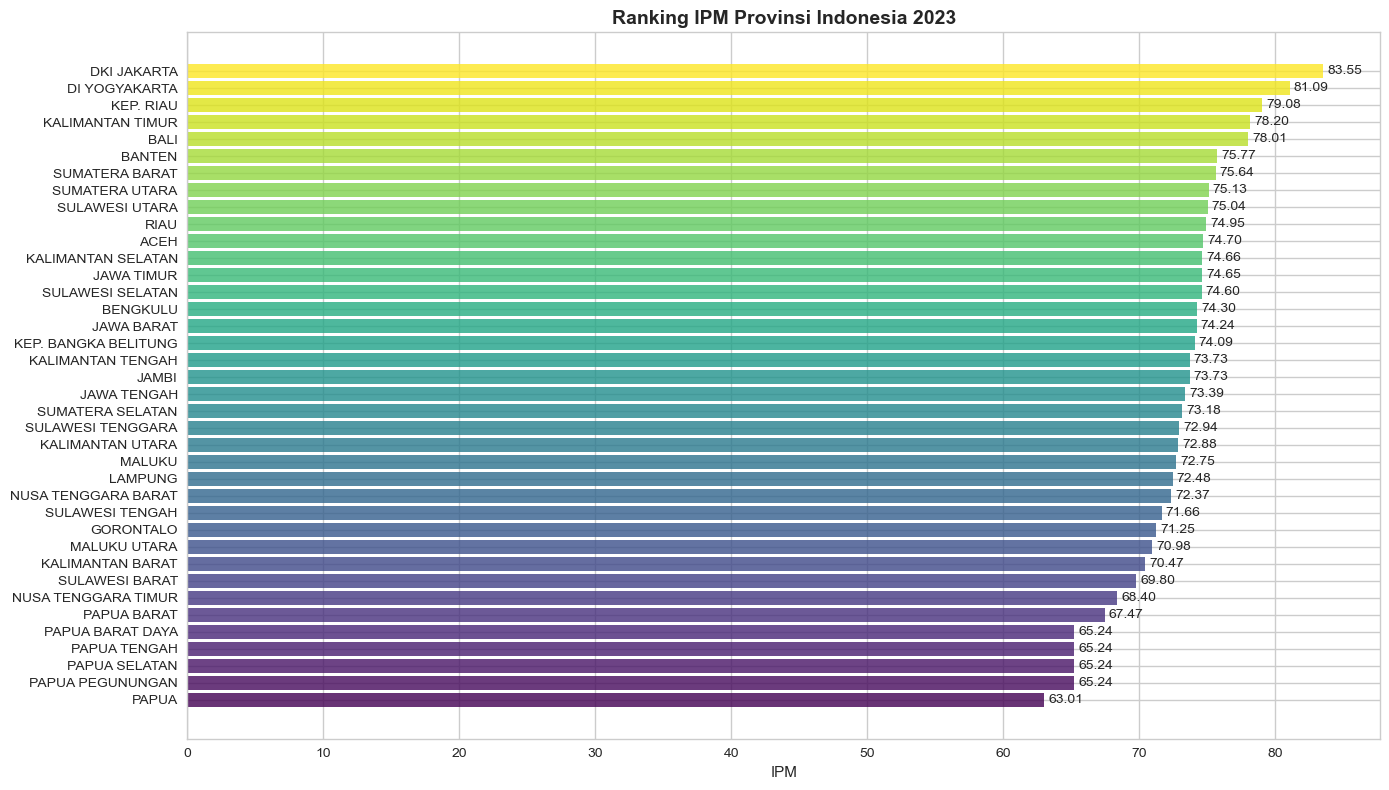


Provinsi dengan IPM tertinggi: DKI JAKARTA (83.55)
Provinsi dengan IPM terendah: PAPUA (63.01)


In [114]:
# Ranking provinsi berdasarkan IPM
plt.figure(figsize=(14, 8))
df_sorted = df.sort_values('IPM', ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted)))

bars = plt.barh(range(len(df_sorted)), df_sorted['IPM'], color=colors, alpha=0.8)
plt.yticks(range(len(df_sorted)), df_sorted['Provinsi'])
plt.xlabel('IPM')
plt.title('Ranking IPM Provinsi Indonesia 2023', fontsize=14, fontweight='bold')

# Tambahkan nilai di ujung bar
for i, (bar, value) in enumerate(zip(bars, df_sorted['IPM'])):
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f'{value:.2f}', va='center', ha='left')

plt.tight_layout()
plt.show()

# Identifikasi provinsi dengan performa terbaik dan terburuk
print(f"\nProvinsi dengan IPM tertinggi: {df.loc[df['IPM'].idxmax(), 'Provinsi']} ({df['IPM'].max():.2f})")
print(f"Provinsi dengan IPM terendah: {df.loc[df['IPM'].idxmin(), 'Provinsi']} ({df['IPM'].min():.2f})")

---
# **3. REKOMENDASI KEBIJAKAN**
Berdasarkan seluruh temuan dan analisis yang telah dipaparkan, berikut adalah **kebijakan dan rekomendasi** yang dapat diambil oleh pemerintah pusat maupun daerah untuk mengoptimalkan distribusi, penyerapan, dan dampak anggaran TKDD terhadap pembangunan


## **3.1 Kebijakan Strategis**

### 1. **Penguatan Tata Kelola Fiskal Daerah Berbasis Kinerja**

* **Kebijakan:** Alokasi TKDD ke depan perlu lebih mempertimbangkan *kinerja penyerapan dan dampak pembangunan* dibanding sekadar jumlah atau luas wilayah.
* **Rekomendasi:** Terapkan *performance-based budgeting* yang menilai efektivitas penggunaan dana dalam meningkatkan indikator kesejahteraan seperti IPM, bukan hanya realisasi fisik atau nominal.

### 2. **Dukungan Teknis dan Kapasitas untuk Daerah Berkinerja Rendah**

* **Kebijakan:** Provinsi seperti Papua yang mencatat realisasi rendah secara persentase perlu mendapatkan *pendampingan teknis dan manajerial* yang lebih intensif.
* **Rekomendasi:** Bentuk *Tim Pendamping Teknis TKDD* di daerah dengan tantangan geografis dan infrastruktur untuk mempercepat penyerapan anggaran secara efektif dan tepat sasaran.

### 3. **Peningkatan Efisiensi Bagi Daerah dengan Dana Relatif Kecil**

* **Kebijakan:** Daerah seperti Gorontalo yang menerima dana kecil harus didorong untuk memaksimalkan efisiensi penggunaan anggaran yang terbatas.
* **Rekomendasi:** Dorong inovasi fiskal lokal dan *program pengelolaan dana berbasis prioritas*, serta adakan pelatihan intensif tentang perencanaan dan evaluasi anggaran berbasis kinerja.

### 4. **Insentif untuk Daerah dengan Serapan Efektif dan Dampak Nyata**

* **Kebijakan:** Provinsi yang berhasil menunjukkan *korelasi positif antara serapan anggaran dan capaian IPM* perlu mendapat *insentif fiskal*.
* **Rekomendasi:** Bangun *sistem reward* berbasis pencapaian IPM per unit dana yang diserap untuk mendorong efisiensi nasional.



## **3.2 Rekomendasi Berdasarkan Analisis Faktor**

### 1. **Fokus pada Penanggulangan Kemiskinan**

* **Rekomendasi:** Karena kemiskinan merupakan penghambat utama IPM (korelasi -0.81), maka prioritaskan *alokasi TKDD untuk program pengentasan kemiskinan*, seperti jaminan sosial, UMKM, dan pendidikan dasar di daerah dengan persentase kemiskinan tinggi.

### 2. **Bangun Sistem Monitoring Real-Time Realisasi TKDD**

* **Rekomendasi:** Kembangkan *dashboard realisasi anggaran berbasis digital dan spasial* untuk mengidentifikasi provinsi dengan deviasi tinggi dari target realisasi seperti Kaltim agar dapat segera diintervensi.


## **3.4 Konklusi Kebijakan**

Realisasi TKDD yang tinggi secara nominal **tidak menjamin** peningkatan kesejahteraan masyarakat. **Efektivitas penyerapan anggaran dan kualitas tata kelola fiskal** jauh lebih berpengaruh terhadap peningkatan IPM.

Dengan demikian, **kebijakan anggaran daerah ke depan harus berpindah dari pendekatan input-oriented (berapa besar anggaran diberikan) menjadi outcome-oriented (apa hasil nyata dari anggaran tersebut).**